# Part 1: Initial Setup and Data Loading

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import spacy 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import tensorflow.compat.v1 as tf_compat

import spacy



tf_compat.logging.set_verbosity(tf_compat.logging.ERROR)




In [2]:
import pandas as pd

 
books_data = pd.read_csv(r"C:\Users\Tareq\Desktop\Ryareson\820 files\archive\books_data.csv")
books_rating = pd.read_csv(r"C:\Users\Tareq\Desktop\Ryareson\820 files\archive\Books_rating.csv")

In [4]:
books_data.head()


,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [2]:
books_rating.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [3]:
# here i combine the data 
import pandas as pd
combined_data = pd.merge(books_data, books_rating, on="Title", how="inner")

In [67]:
combined_data.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,Id,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN,1882931173,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,0826414346,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,0826414346,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,0826414346,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,0826414346,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [4]:
combined_data.shape

(3000000, 19)

#  Part 2: Data Exploration and Cleaning

In [6]:
# Explore textual columns in combined_data DataFrame
text_columns = ["Title", "description", "authors", "publisher", "categories", "review/summary", "review/text"]
for col in text_columns:
    print(f"Column: {col}")
    print(combined_data[col].head())

Column: Title
0    Its Only Art If Its Well Hung!
1          Dr. Seuss: American Icon
2          Dr. Seuss: American Icon
3          Dr. Seuss: American Icon
4          Dr. Seuss: American Icon
Name: Title, dtype: object
Column: description
0                                                  NaN
1    Philip Nel takes a fascinating look into the k...
2    Philip Nel takes a fascinating look into the k...
3    Philip Nel takes a fascinating look into the k...
4    Philip Nel takes a fascinating look into the k...
Name: description, dtype: object
Column: authors
0    ['Julie Strain']
1      ['Philip Nel']
2      ['Philip Nel']
3      ['Philip Nel']
4      ['Philip Nel']
Name: authors, dtype: object
Column: publisher
0          NaN
1    A&C Black
2    A&C Black
3    A&C Black
4    A&C Black
Name: publisher, dtype: object
Column: categories
0      ['Comics & Graphic Novels']
1    ['Biography & Autobiography']
2    ['Biography & Autobiography']
3    ['Biography & Autobiography']
4    ['Biogra

In [5]:
print(combined_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 19 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Title               object 
 1   description         object 
 2   authors             object 
 3   image               object 
 4   previewLink         object 
 5   publisher           object 
 6   publishedDate       object 
 7   infoLink            object 
 8   categories          object 
 9   ratingsCount        float64
 10  Id                  object 
 11  Price               float64
 12  User_id             object 
 13  profileName         object 
 14  review/helpfulness  object 
 15  review/score        float64
 16  review/time         int64  
 17  review/summary      object 
 18  review/text         object 
dtypes: float64(3), int64(1), object(15)
memory usage: 434.9+ MB
None


In [70]:
print(combined_data.describe())

       ratingsCount          Price  review/score   review/time
count  1.639306e+06  481171.000000  3.000000e+06  3.000000e+06
mean   2.720647e+02      21.762656  4.215289e+00  1.132307e+09
std    7.887721e+02      26.206541  1.203054e+00  1.493202e+08
min    1.000000e+00       1.000000  1.000000e+00 -1.000000e+00
25%    3.000000e+00      10.780000  4.000000e+00  9.999072e+08
50%    1.000000e+01      14.930000  5.000000e+00  1.128298e+09
75%    5.500000e+01      23.950000  5.000000e+00  1.269130e+09
max    4.895000e+03     995.000000  5.000000e+00  1.362355e+09


In [10]:
print(combined_data.isnull().sum())

Title                     208
description            640225
authors                390634
image                  540306
previewLink            330623
publisher              782617
publishedDate          354581
infoLink               330623
categories             551498
ratingsCount          1360694
Id                          0
Price                 2518829
User_id                561787
profileName            561905
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64


Extraction of relevant attributes to my study/project 

In [4]:
#i extract attributes related to my project
relevant_attributes = combined_data[
    ["Title", "description", "authors", "categories", "ratingsCount", "review/score", "review/summary", "review/text"]
]

In [7]:
relevant_attributes.head()

,Title,description,authors,categories,ratingsCount,review/score,review/summary,review/text
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],['Comics & Graphic Novels'],NaN,4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],['Biography & Autobiography'],NaN,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],['Biography & Autobiography'],NaN,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],['Biography & Autobiography'],NaN,4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],['Biography & Autobiography'],NaN,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [13]:
relevant_attributes.shape

(3000000, 8)

In [9]:
# here Checking for duplicates and for NaN values
duplicates = relevant_attributes.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Check for NaN values
nan_values = relevant_attributes.isna().sum()
print("\nNumber of NaN values per column:")
print(nan_values)

Number of duplicate rows: 378849

Number of NaN values per column:
Title                 208
description        640225
authors            390634
categories         551498
ratingsCount      1360694
review/score            0
review/summary        407
review/text             8
dtype: int64


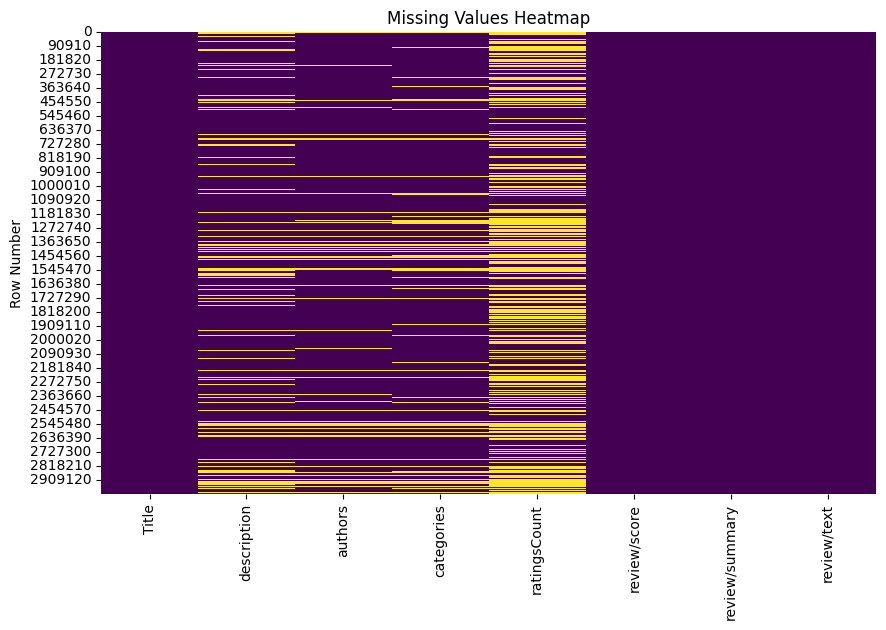

In [17]:
# Visualize Missing Values

plt.figure(figsize=(10, 6))
sns.heatmap(relevant_attributes.isnull(), cbar=False, cmap='viridis') 
plt.title("Missing Values Heatmap")
plt.ylabel("Row Number")  
plt.show()


In [15]:
#Explore Categorical Variables

unique_authors = relevant_attributes['authors'].unique()
print("Unique Authors:", unique_authors)
print("Number of Unique Authors:", len(unique_authors))

unique_categories = relevant_attributes['categories'].unique()
print("\nUnique Categories:", unique_categories)
print("Number of Unique Categories:", len(unique_categories))

unique_reviews = relevant_attributes['review/text'].unique()
print("\nUnique Reviews:", unique_reviews)
print("Number of Unique Reviews:", len(unique_reviews))



Unique Authors: ["['Julie Strain']" "['Philip Nel']" "['David R. Ray']" ...
 "['Daniel Banach', 'Travis Jones']" "['Wild Wild Cabbage']"
 "['David B. Johnson', 'Thomas A. Mowry']"]
Number of Unique Authors: 127279

Unique Categories: ["['Comics & Graphic Novels']" "['Biography & Autobiography']"
 "['Religion']" ... "['Portsmouth Island (N.C.)']" "['Tobacco']"
 "['Flame in the wind (Motion picture)']"]
Number of Unique Categories: 10884

Unique Reviews: ["This is only for Julie Strain fans. It's a collection of her photos -- about 80 pages worth with a nice section of paintings by Olivia.If you're looking for heavy literary content, this isn't the place to find it -- there's only about 2 pages with text and everything else is photos.Bottom line: if you only want one book, the Six Foot One ... is probably a better choice, however, if you like Julie like I like Julie, you won't go wrong on this one either."
 "I don't care much for Dr. Seuss but after reading Philip Nel's book I changed my

In [7]:
# samples of text/review
 
sample_reviews = relevant_attributes['review/text'].sample(n=3) 
for review in sample_reviews:
    print(review)


I just really liked this. I'm the kind of girl who likes outdoor activities, including diving, so I really got into Crash Dive. The author clearly knows what he's talking about, and has a knack for description, 'specially underwater. Very exciting and kind of relevant since we just got hit by terrorists for real. An exciting read that makes you think. This writer has another fan.
I had read Fagles new translation, but nothing prepared me for the influential version. This is how the Iliad should be and the fabulous translation makes this accessible and easy to understand. A few parts are boring (the enumeration of ships and soldiers is boring), but this is a compelling story. The book is clear and easy to understand, evenly paced without dragging. Definitely a recommendation!
Using this stationary is fun and I am WAY out of the intended demographic. Even grandmothers can use this handy kit, and it brings a bit of enjoyment and wizardry to our correspondence. Paper - 25 sheets!! Envelope

In [5]:
# Check for NaN values
nan_values = relevant_attributes.isna().sum()
print("\nNumber of NaN values per column:")
print(nan_values)


Number of NaN values per column:
Title                 208
description        640225
authors            390634
categories         551498
ratingsCount      1360694
review/score            0
review/summary        407
review/text             8
dtype: int64


I Am  Droping rows with missing values in the "review/text" column they are only few

In [6]:
relevant_attributes = relevant_attributes.dropna(subset=['review/text']).copy()

Here, Impute missing values in the "ratingsCount" column

In [7]:
#Here, Impute missing values in the "ratingsCount" column

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
relevant_attributes.loc[:, 'ratingsCount'] = imputer.fit_transform(relevant_attributes[['ratingsCount']])

In [8]:
# Drop duplicate rows
relevant_attributes.drop_duplicates(inplace=True)
print("Number of duplicate rows after dropping:", relevant_attributes.duplicated().sum())

Number of duplicate rows after dropping: 0


In [9]:
#Replacing missing values in "authors" and "categories" columns with "Unknown"

relevant_attributes['authors'] = relevant_attributes['authors'].fillna('Unknown')
relevant_attributes['categories'] = relevant_attributes['categories'].fillna('Unknown')

In [10]:
# Droping rows with missing values in Title and review/summary columns

relevant_attributes.dropna(subset=['Title', 'review/summary', 'description'], inplace=True)

In [11]:
# Replace "Unknown" with "General" for the first half and "Other" for the second half in the 'authors' column
 
condition = (np.arange(len(relevant_attributes)) < len(relevant_attributes) / 2)

relevant_attributes.loc[condition, 'authors'] = relevant_attributes.loc[condition, 'authors'].replace('Unknown', 'Unspecified')
relevant_attributes.loc[~condition, 'authors'] =relevant_attributes.loc[~condition, 'authors'].replace('Unknown', 'Other')
                        

In [12]:
# Replace "Unknown" with "General" for the first half and "Other" for the second half in the 'authors' column
import numpy as np

condition = (np.arange(len(relevant_attributes)) < len(relevant_attributes) / 2)

relevant_attributes.loc[condition, 'categories'] = relevant_attributes.loc[condition, 'categories'].replace('Unknown', 'Unspecified')
relevant_attributes.loc[~condition, 'categories'] = relevant_attributes.loc[~condition, 'categories'].replace('Unknown', 'Other')


In [13]:
# Custom function to clean author names 
import pandas as pd
import numpy as np

def clean_and_join_authors(authors):
    if isinstance(authors, str):
        cleaned_authors = [author.strip().strip("'") for author in authors.strip("[]").split(',')]
        return ', '.join(cleaned_authors).replace(',', ', ')
    else:
        return np.nan

relevant_attributes.loc[:,'authors'] = relevant_attributes['authors'].apply(clean_and_join_authors)

print(relevant_attributes['authors'])

1                                  Philip Nel
2                                  Philip Nel
3                                  Philip Nel
4                                  Philip Nel
5                                  Philip Nel
                          ...                
2999995                           Zadie Smith
2999996    David B. Johnson,  Thomas A. Mowry
2999997    David B. Johnson,  Thomas A. Mowry
2999998    David B. Johnson,  Thomas A. Mowry
2999999    David B. Johnson,  Thomas A. Mowry
Name: authors, Length: 2048532, dtype: object


In [14]:
# Custom function to clean remove leading/trailing spaces and single quotes from each category

import numpy as np

def clean_and_join_categories(categories):
    if isinstance(categories, str):
        cleaned_categories = [category.strip("', ") for category in categories.strip("[]").split(',')]
        return ', '.join(cleaned_categories)
    else:
        return np.nan  
 
relevant_attributes['categories'] = relevant_attributes['categories'].apply(clean_and_join_categories)

print(relevant_attributes['categories'])

1          Biography & Autobiography
2          Biography & Autobiography
3          Biography & Autobiography
4          Biography & Autobiography
5          Biography & Autobiography
                     ...            
2999995                      Fiction
2999996                        Other
2999997                        Other
2999998                        Other
2999999                        Other
Name: categories, Length: 2048532, dtype: object


In [15]:
relevant_attributes.shape

(2048532, 8)

In [19]:
print(relevant_attributes.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2048532 entries, 1 to 2999999
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Title           object 
 1   description     object 
 2   authors         object 
 3   categories      object 
 4   ratingsCount    float64
 5   review/score    float64
 6   review/summary  object 
 7   review/text     object 
dtypes: float64(2), object(6)
memory usage: 140.7+ MB
None


C:\Users\Tareq\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

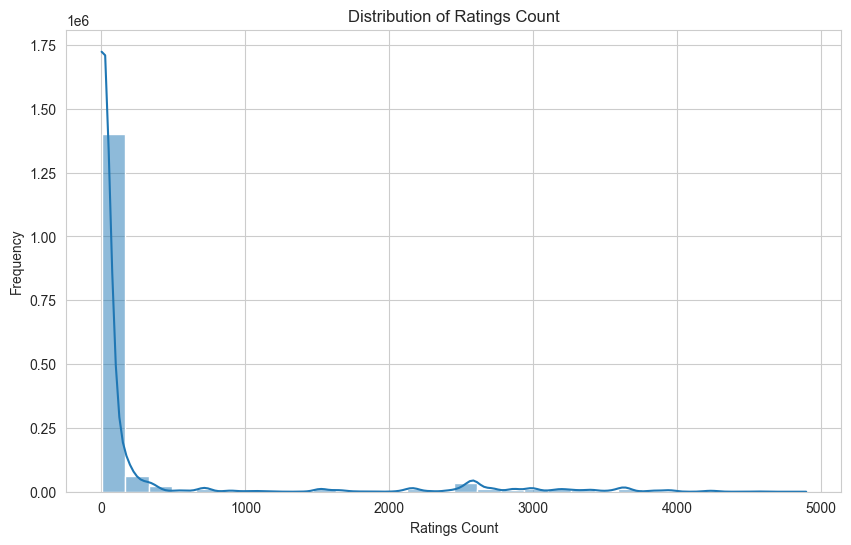

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
 
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_data, x='ratingsCount', bins=30, kde=True)
plt.title('Distribution of Ratings Count')
plt.xlabel('Ratings Count')
plt.ylabel('Frequency') 

Here i am checking the categories attribute which largest category/genre 

In [22]:
category_counts = relevant_attributes['categories'].value_counts()

sorted_categories = category_counts.sort_values(ascending=False)

 top_ten_counts = sorted_categories.head(10)
 
rest_count = sorted_categories[10:].sum()

print("Count of the top ten categories:")
print(top_ten_counts)

print("\nCount of the rest of the categories combined:")
print(rest_count)


Count of the top ten categories:
categories
Fiction                      668204
Juvenile Fiction             168555
Biography & Autobiography     94016
Religion                      82896
History                       81201
Business & Economics          59693
Unspecified                   41052
Other                         40891
Computers                     40780
Cooking                       28208
Name: count, dtype: int64

Count of the rest of the categories combined:
743036


C:\Users\Tareq\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


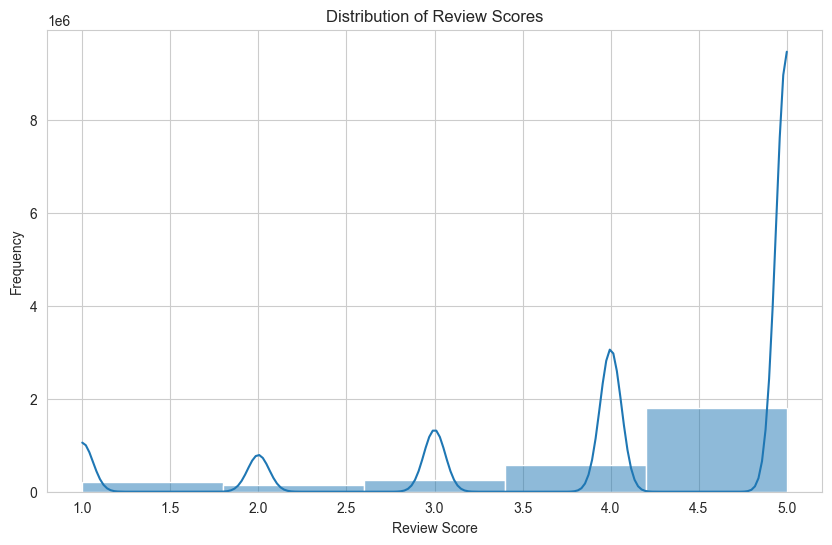

In [37]:
# Visualizing the distribution of review scores
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=relevant_attributes, x='review/score', bins=5, kde=True)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.show()

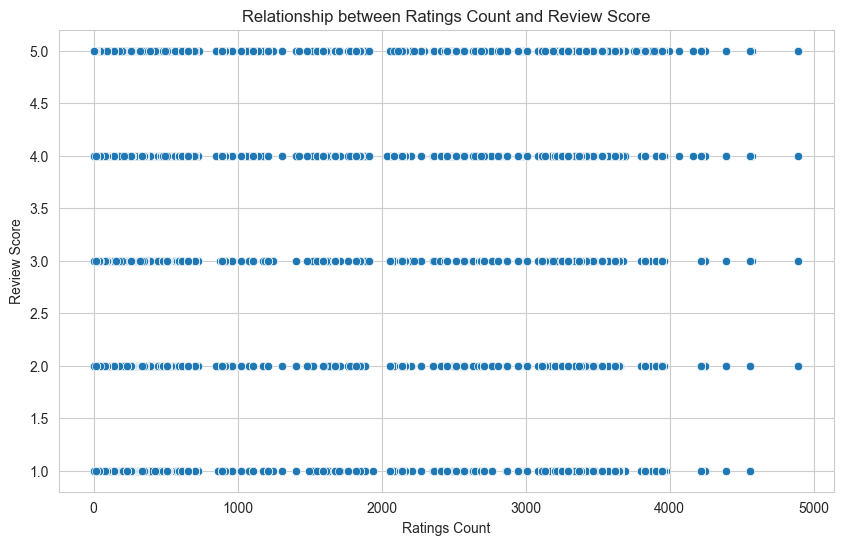

In [28]:
# Visualizing the relationship between review score and ratings count
import matplotlib.pyplot as plt
import seaborn as sns


# Visualizing the relationship between review score and ratings count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=relevant_attributes, x='ratingsCount', y='review/score')
plt.title('Relationship between Ratings Count and Review Score')
plt.xlabel('Ratings Count')
plt.ylabel('Review Score')
plt.show()


In [31]:
# Calculate summary statistics
mean = relevant_attributes['review/score'].mean()
median = relevant_attributes['review/score'].median()
std_dev = relevant_attributes['review/score'].std()
skewness = relevant_attributes['review/score'].skew()
kurtosis = relevant_attributes['review/score'].kurtosis()

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std_dev}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")


Mean: 4.215289333333334
Median: 5.0
Standard Deviation: 1.2030537472334013
Skewness: -1.5191028505130895
Kurtosis: 1.2064600645925103


In [23]:
# Check for NaN values
nan_values = relevant_attributes.isna().sum()
print("\nNumber of NaN values per column:")
print(nan_values)


Number of NaN values per column:
Title             0
description       0
authors           0
categories        0
ratingsCount      0
review/score      0
review/summary    0
review/text       0
dtype: int64


# Part 3: Sklearn sample

here i am taking 10% Stratified sample from the totql data using sklearn library and choocing gategories variable as a target variable,or basically dependent variable 

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd
np.random.seed(42)

X = relevant_attributes.drop(['categories'], axis=1)   
y = relevant_attributes['categories']   

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=1)  

 
sampled_df = pd.DataFrame()
sampled_df = pd.DataFrame()
for train_index, test_index in sss.split(X, y):
    X_sample = X.iloc[test_index]   
    y_sample = y.iloc[test_index]   
    sampled_df = X_sample.copy()   
    sampled_df['categories'] = y_sample  
 

print(sampled_df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 204854 entries, 2661854 to 2695702
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Title           204854 non-null  object 
 1   description     204854 non-null  object 
 2   authors         204854 non-null  object 
 3   ratingsCount    204854 non-null  float64
 4   review/score    204854 non-null  float64
 5   review/summary  204854 non-null  object 
 6   review/text     204854 non-null  object 
 7   categories      204854 non-null  object 
dtypes: float64(2), object(6)
memory usage: 14.1+ MB
None


In [21]:
sampled_df.head()

,Title,description,authors,ratingsCount,review/score,review/summary,review/text,categories
2661854,"Eldest (Inheritance, Book 2)","After successfully evading an Urgals ambush, E...",Christopher Paolini,167.0,5.0,Happy,I am happy with my purchase. It was in great c...,Juvenile Fiction
2701459,Hammock: How to Make Your Own and Lie in It,Information on the history of the hammock prec...,Denison Andrews,10.0,5.0,"I love the SPRANG (pronounced ""sprong"") hammock!",This book is a great introduction to making si...,Hammocks.
782292,The Dogs of War,#1 New York Times bestselling author Frederick...,Frederick Forsyth,8.0,5.0,Not Free SF Reader,People with no reason to worry about continued...,Fiction
349600,Year of Wonders (Turtleback School & Library B...,"""New Mexico's rich and varied history is easil...",Arthur Pike & David Pike,10.0,5.0,Year of Wonders,This was a extremely enjoyable book which migh...,History
458230,Out of the Dust,Acclaimed author Karen Hesse's Newbery Medal-w...,Karen Hesse,156.0,5.0,Great Book!!,THis is a great book!! It's about a girl named...,Juvenile Fiction


### Validation the Sample 

The code visualizes the distribution of the top 10 most common categories in both the population and a stratified sample. to comparing the counts of categories between the population dataset

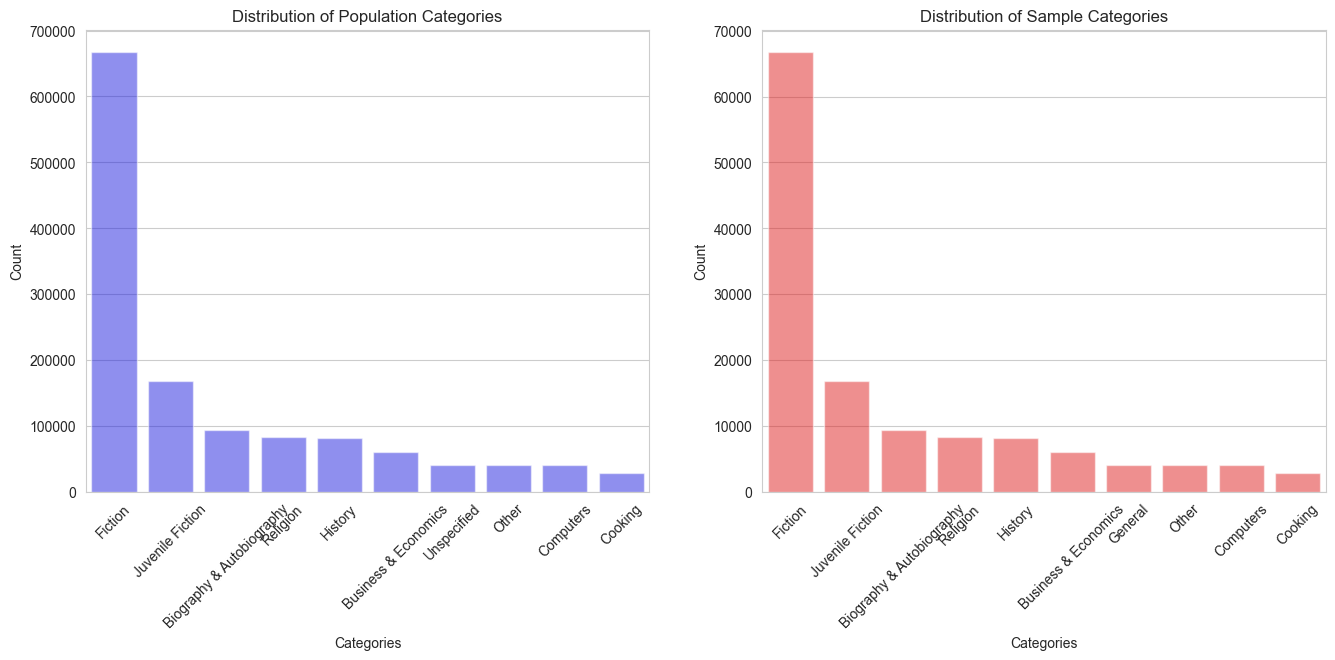

In [27]:

population_category_counts = relevant_attributes['categories'].value_counts().head(10)
sample_category_counts = sampled_df['categories'].value_counts().head(10)

# Create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

 
sns.barplot(x=population_category_counts.index, y=population_category_counts.values, ax=axes[0], color='blue', alpha=0.5)
axes[0].set_title('Distribution of Population Categories')
axes[0].set_xlabel('Categories')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

 
sns.barplot(x=sample_category_counts.index, y=sample_category_counts.values, ax=axes[1], color='red', alpha=0.5)
axes[1].set_title('Distribution of Sample Categories')
axes[1].set_xlabel('Categories')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)
 

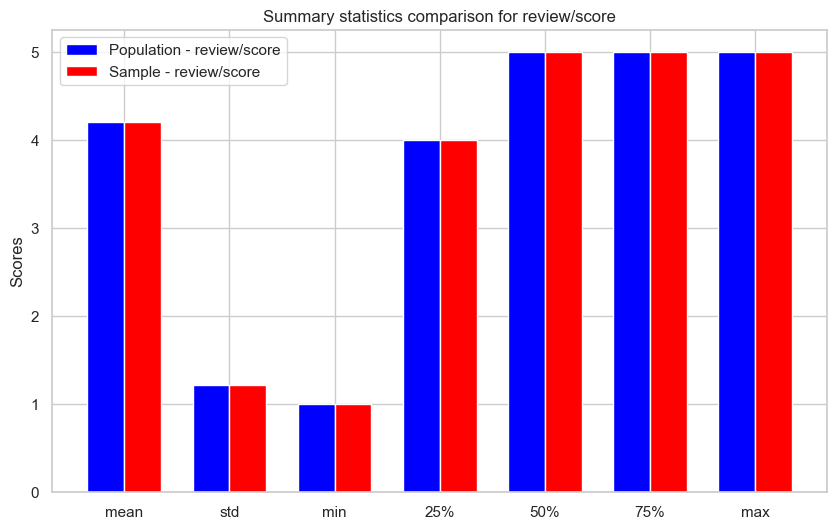

In [415]:
# Compute summary statistics 'review/score' for population(relavent_attripute) and sample 

population_summary_stats = relevant_attributes['review/score'].describe()
sample_summary_stats = sampled_df['review/score'].describe()

fig, ax = plt.subplots(figsize=(10, 6))  # Create 1 plot

rects1 = ax.bar(x - width/2, population_vals, width, label='Population - review/score', color='blue')
rects2 = ax.bar(x + width/2, sample_vals, width, label='Sample - review/score', color='red')

ax.set_ylabel('Scores')
ax.set_title('Summary statistics comparison for review/score')
ax.set_xticks(x)
ax.set_xticklabels(stats)
ax.legend()

plt.show()




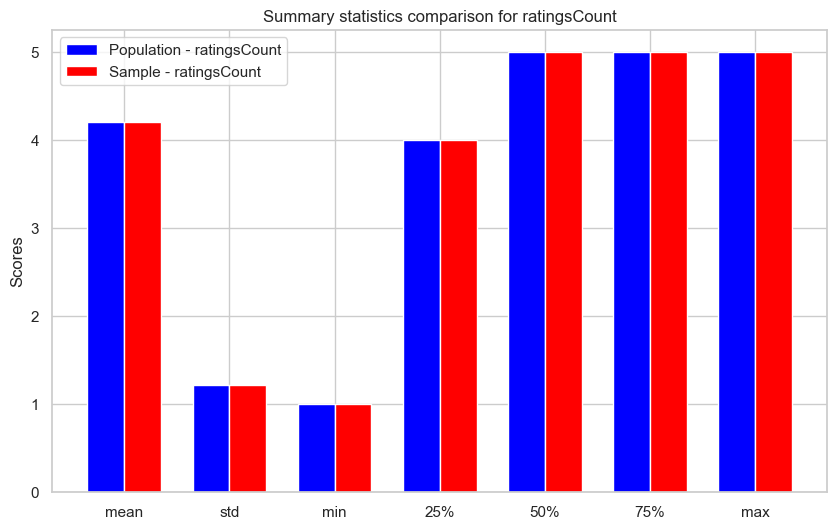

In [416]:
# Compute summary statistics for 'ratingsCount' for both datasets original and sampled 
population_summary_stats = relevant_attributes['ratingsCount'].describe()
sample_summary_stats = sampled_df['ratingsCount'].describe()

fig, ax = plt.subplots(figsize=(10, 6))   

rects1 = ax.bar(x - width/2, population_vals, width, label='Population - ratingsCount', color='blue')
rects2 = ax.bar(x + width/2, sample_vals, width, label='Sample - ratingsCount', color='red')

ax.set_ylabel('Scores')
ax.set_title('Summary statistics comparison for ratingsCount')
ax.set_xticks(x)
ax.set_xticklabels(stats)
ax.legend()


below codes to create histograms to compare between both datas  

C:\Users\Tareq\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tareq\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tareq\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tareq\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

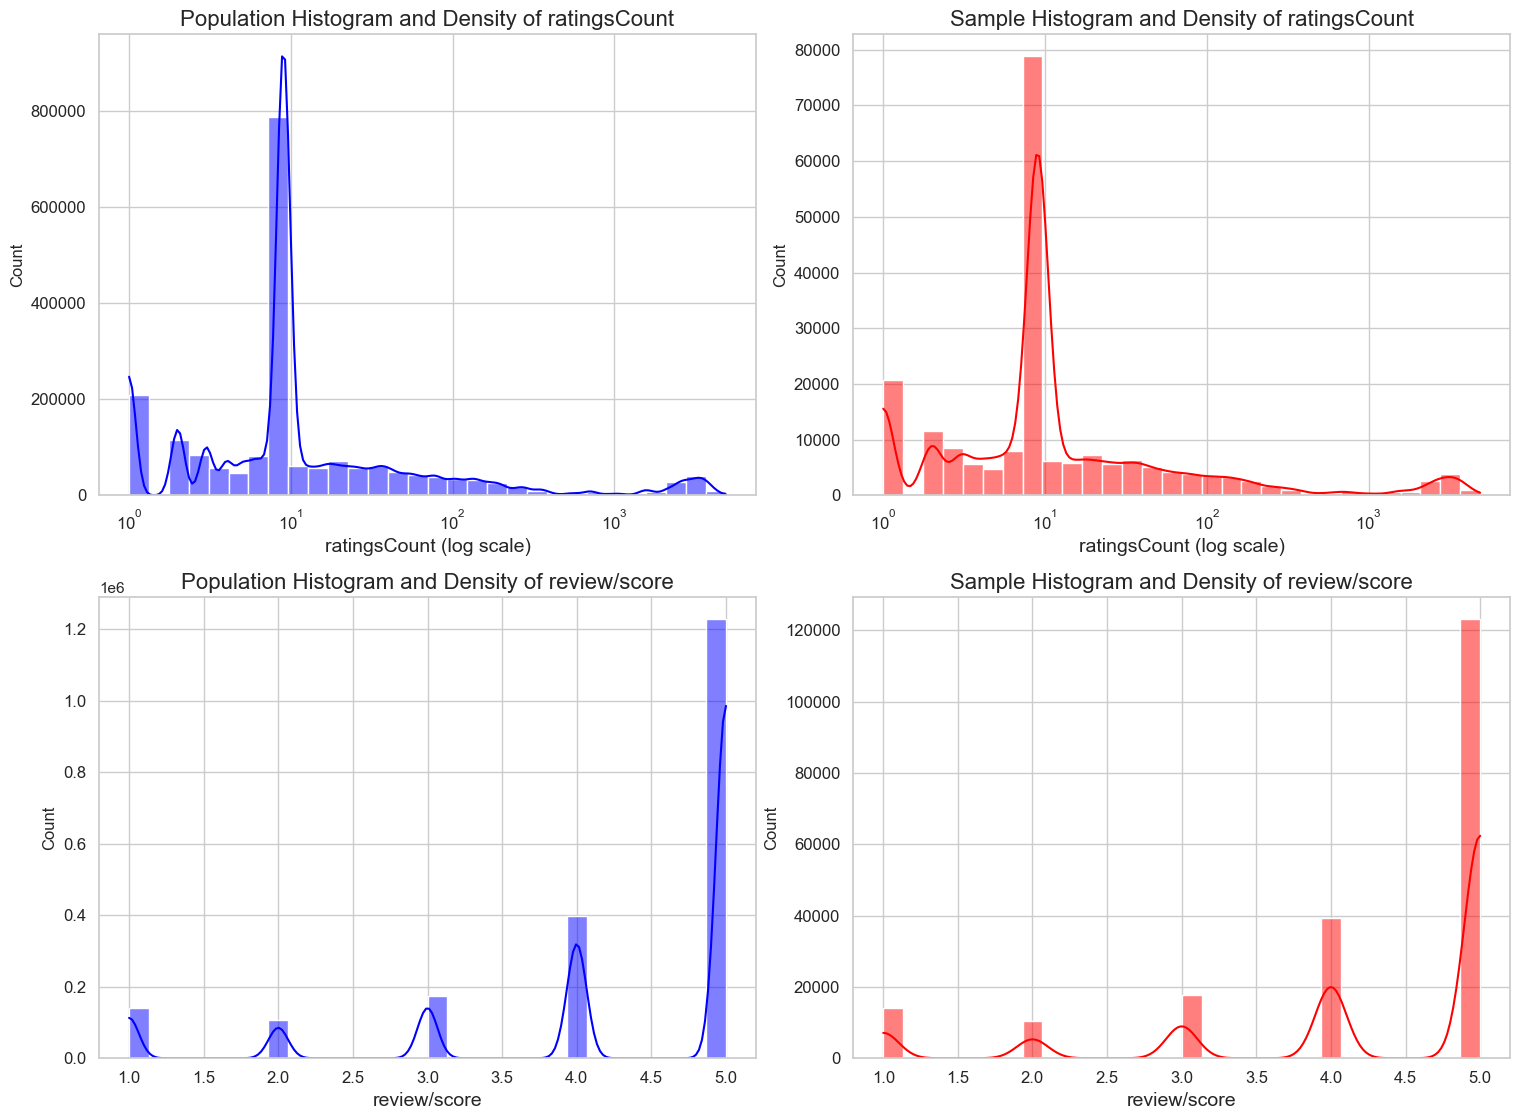

In [290]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

#  Population
sns.histplot(relevant_attributes['ratingsCount'], bins=30, kde=True, color="blue", ax=axes[0, 0], log_scale=True)
axes[0, 0].set_title('Population Histogram and Density of ratingsCount', fontsize=16)
axes[0, 0].set_xlabel('ratingsCount (log scale)', fontsize=14)

#  Sample
sns.histplot(sampled_df['ratingsCount'], bins=30, kde=True, color="red", ax=axes[0, 1], log_scale=True)
axes[0, 1].set_title('Sample Histogram and Density of ratingsCount', fontsize=16)
axes[0, 1].set_xlabel('ratingsCount (log scale)', fontsize=14)

# Population
sns.histplot(relevant_attributes['review/score'], bins=30, kde=True, color="blue", ax=axes[1, 0])
axes[1, 0].set_title('Population Histogram and Density of review/score', fontsize=16)
axes[1, 0].set_xlabel('review/score', fontsize=14)

#  Sample
sns.histplot(sampled_df['review/score'], bins=30, kde=True, color="red", ax=axes[1, 1])
axes[1, 1].set_title('Sample Histogram and Density of review/score', fontsize=16)
axes[1, 1].set_xlabel('review/score', fontsize=14)


In [199]:
#some basic Statistics  For ratingsCount in both datas 
print("Full dataset 'ratingsCount' statistics:", relevant_attributes['ratingsCount'].describe())
print("Sampled dataset 'ratingsCount' statistics:", sampled_df['ratingsCount'].describe())

# For review/score
print("Full dataset 'review/score' statistics:", relevant_attributes['review/score'].describe())
print("Sampled dataset 'review/score' statistics:", sampled_df['review/score'].describe())


Full dataset 'ratingsCount' statistics: count    2.047264e+06
mean     1.510525e+02
std      6.019904e+02
min      1.000000e+00
25%      5.000000e+00
50%      9.000000e+00
75%      1.900000e+01
max      4.895000e+03
Name: ratingsCount, dtype: float64
Sampled dataset 'ratingsCount' statistics: count    204727.000000
mean        149.965329
std         600.778609
min           1.000000
25%           5.000000
50%           9.000000
75%          19.000000
max        4895.000000
Name: ratingsCount, dtype: float64
Full dataset 'review/score' statistics: count    2.047264e+06
mean     4.204405e+00
std      1.212204e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: review/score, dtype: float64
Sampled dataset 'review/score' statistics: count    204727.000000
mean          4.207071
std           1.211205
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: rev

In [17]:
print(sampled_df.isna())


        Title  description  authors  ratingsCount  review/score  \
0       False        False    False         False         False   
1       False        False    False         False         False   
2       False        False    False         False         False   
3       False        False    False         False         False   
4       False        False    False         False         False   
...       ...          ...      ...           ...           ...   
204722  False        False    False         False         False   
204723  False        False    False         False         False   
204724  False        False    False         False         False   
204725  False        False    False         False         False   
204726  False        False    False         False         False   

        review/summary  review/text  categories  tokenized_review  \
0                False        False       False             False   
1                False        False       False          

In [65]:
# Calculate the distribution of categories
category_distribution = relevant_attributes['categories'].value_counts(normalize=True)

print("Category Distribution:")
print(category_distribution)


Category Distribution:
categories
Fiction                               3.261868e-01
Juvenile Fiction                      8.228087e-02
Biography & Autobiography             4.589433e-02
Religion                              4.046605e-02
Unknown                               4.000084e-02
                                          ...     
Action research in education          4.881544e-07
Vintners                              4.881544e-07
Canon law                             4.881544e-07
Caucasus, Northern (Russia)           4.881544e-07
Flame in the wind (Motion picture)    4.881544e-07
Name: proportion, Length: 5416, dtype: float64


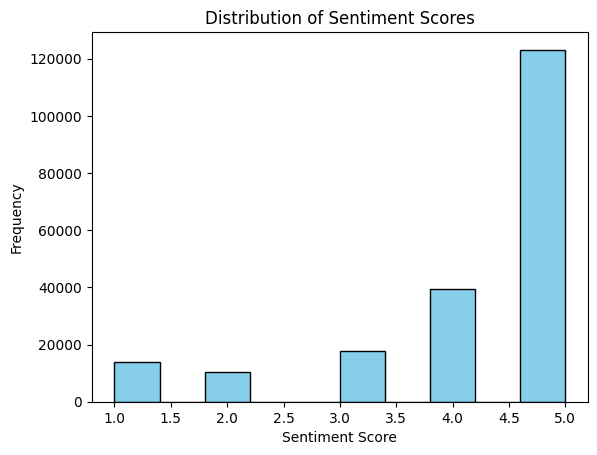

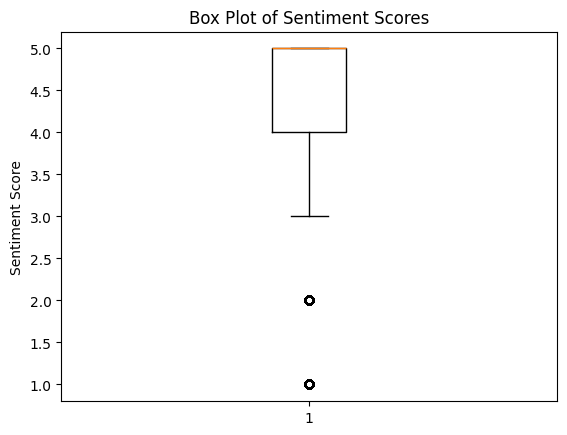

In [206]:

# Plot histogram of sentiment scores
plt.hist(sampled_df['review/score'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Plot box plot of sentiment scores
plt.boxplot(sampled_data['review/score'])
plt.title('Box Plot of Sentiment Scores-review/score')
plt.ylabel('Sentiment Score')
plt.show()

# Part 4 Text preprocessing   

### Tokenization

In [22]:
# here Tokenization and stop word and Punctuation removal

import pandas as pd
import spacy
 
nlp = spacy.load("en_core_web_sm")

def tokenize_review(review):
 
    doc = nlp(review)
    tokens = [token.text for token in doc if not token.is_punct and not token.is_stop]
    return tokens

sampled_df['tokenized_review'] = sampled_df['review/text'].apply(tokenize_review)

print(sampled_df.head())


                                                     Title  \
2661854                       Eldest (Inheritance, Book 2)   
2701459        Hammock: How to Make Your Own and Lie in It   
782292                                     The Dogs of War   
349600   Year of Wonders (Turtleback School & Library B...   
458230                                     Out of the Dust   

                                               description  \
2661854  After successfully evading an Urgals ambush, E...   
2701459  Information on the history of the hammock prec...   
782292   #1 New York Times bestselling author Frederick...   
349600   "New Mexico's rich and varied history is easil...   
458230   Acclaimed author Karen Hesse's Newbery Medal-w...   

                          authors  ratingsCount  review/score  \
2661854       Christopher Paolini         167.0           5.0   
2701459           Denison Andrews          10.0           5.0   
782292          Frederick Forsyth           8.0           5

In [50]:
  
print(sampled_df['tokenized_review'].head(10))


2661854    [happy, purchase, great, condition, come, quic...
2701459    [book, great, introduction, make, simple, hamm...
782292     [people, reason, worry, continue, live, bad, o...
349600     [extremely, enjoyable, book, strange, book, de...
458230     [great, book, girl, name, billie, jo, living, ...
204721     [book, give, gift, dear, friend, jackie, max, ...
442053     [good, spy, novel, write, good, le, carre, abl...
1897329    [girl, age, read, book, come, read, woman, nov...
1685336    [domine, exaudi, vocem, meum, cslewi, like, th...
1829289    [read, work, basically, focus, hume, famous, t...
Name: tokenized_review, dtype: object


In [31]:
# here i am Lowercasing the tokens
sampled_df['tokenized_review'] = sampled_df['tokenized_review'].apply(lambda tokens: [token.lower() for token in tokens])


In [9]:
# removing numeric characters
sampled_df['tokenized_review'] = sampled_df['tokenized_review'].apply(lambda tokens: [token for token in tokens if not token.isdigit()])


In [47]:
#here i am doing Lemmatization

import spacy

nlp = spacy.load("en_core_web_sm")

def lemmatize_tokens(tokens):
    doc = nlp(" ".join(tokens))
    lemmatized_tokens = [token.lemma_ for token in doc]
    return lemmatized_tokens

# Assuming sampled_df is your DataFrame and 'tokenized_review' is the column containing tokens
sampled_df['tokenized_review'] = sampled_df['tokenized_review'].apply(lemmatize_tokens)


In [8]:
# here removing special characters 

import re

def remove_special_characters(tokens):
    cleaned_tokens = [re.sub(r'[^a-zA-Z0-9\s]', '', token) for token in tokens]
    return cleaned_tokens

sampled_df['tokenized_review'] = sampled_df['tokenized_review'].apply(remove_special_characters)



In [27]:
sampled_df.head()

,Title,description,authors,ratingsCount,review/score,review/summary,review/text,categories,tokenized_review,review_length1
0,Sacred Path Cards: The Discovery of Self Throu...,This extraordinary tool for self-discovery dra...,Jamie Sams,2.0,4.0,I regularly use the cards and read the book an...,The book and the cards have definately changed...,"Body, Mind & Spirit","[book, card, definately, change, live, life, u...",19
1,Lord of the flies,William Golding’s unforgettable classic of boy...,William Golding,2861.0,5.0,Lord of the Flies,This book was written excellentally by Golding...,Fiction,"[book, write, excellentally, golde, express, o...",20
2,Lord of the Flies,William Golding’s unforgettable classic of boy...,William Golding,2861.0,4.0,Lord of the flies,The Lord of the flies takes you on a realistic...,Fiction,"[lord, fly, take, realistic, journy, story, st...",42
3,The doomsters,"Hired by Carl Hallman, the desperate-eyed junk...",Ross Macdonald,3.0,5.0,Both a good puzzler and good though tragic drama,I don't know why the heck it took me so long t...,Fiction,"[know, heck, take, long, discover, ross, macdo...",78
4,"The Hobbitt, or there and back again; illustra...","Bilbo Baggins, a respectable, well-to-do hobbi...",J. R. R. Tolkien,9.0,5.0,Classic,This book is a timeless classic that is and wi...,Fiction,"[book, timeless, classic, continue, enjoy, gen...",11


# Part 5: EDA

In [4]:
# Check the data type of the tokenized_review column
data_type = type(sampled_df['tokenized_review'].iloc[0])
print("Data type of the tokenized_review column:", data_type)

# to Visual inspection of the first few entries in the tokenized_review column
print("First few entries in the tokenized_review column:")
print(sampled_df['tokenized_review'].head())

# Check if all entries in the tokenized_review column are lists
all_are_lists = all(isinstance(review, list) for review in sampled_df['tokenized_review'])
print("Are all entries in the tokenized_review column lists?", all_are_lists)

# Check the number of tokens in each entry
token_counts = sampled_df['tokenized_review'].apply(len)
print("Number of tokens in each entry:")
print(token_counts)



Data type of the tokenized_review column: <class 'list'>
First few entries in the tokenized_review column:
0    [book, card, definately, change, live, life, u...
1    [book, write, excellentally, golde, express, o...
2    [lord, fly, take, realistic, journy, story, st...
3    [know, heck, take, long, discover, ross, macdo...
4    [book, timeless, classic, continue, enjoy, gen...
Name: tokenized_review, dtype: object
Are all entries in the tokenized_review column lists? True
Number of tokens in each entry:
0          19
1          20
2          42
3          78
4          11
         ... 
204722     73
204723     13
204724     38
204725     75
204726    122
Name: tokenized_review, Length: 204727, dtype: int64


In [5]:
# Find the highest ratingsCount and the lowest ratingsCount
highest_ratings_count = sampled_df['ratingsCount'].max()

lowest_ratings_count = sampled_df['ratingsCount'].min()

print("Highest ratingsCount:", highest_ratings_count)
print("Lowest ratingsCount:", lowest_ratings_count)

Highest ratingsCount: 4895.0
Lowest ratingsCount: 1.0


Categorize Sentiment review/Scores Positive Neutral Negative in sentiment_category a new column 

In [16]:
def categorize_sentiment(score):
    if score >= 4.0:
        return 'Positive'
    elif score >= 2.5:
        return 'Neutral'
    else:
        return 'Negative'

sampled_df['sentiment_category'] = sampled_df['review/score'].apply(categorize_sentiment)

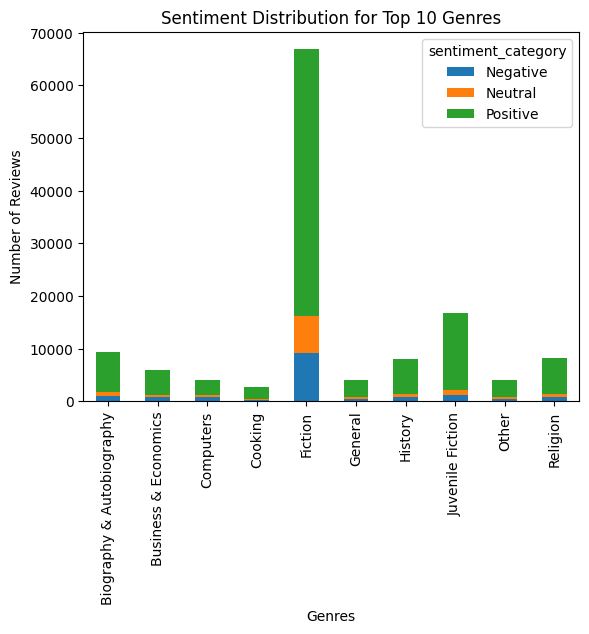

In [11]:
# Find the top 10 most common genres
top_genres = sampled_df['categories'].value_counts().head(10).index

top_genres_df = sampled_df[sampled_df['categories'].isin(top_genres)]

pd.crosstab(top_genres_df['categories'], top_genres_df['sentiment_category']).plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution for Top 10 Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Reviews')
plt.show()


visually explores the relationship between the popularity (measured by ratings count) and the sentiment score of books in the sampled dataset


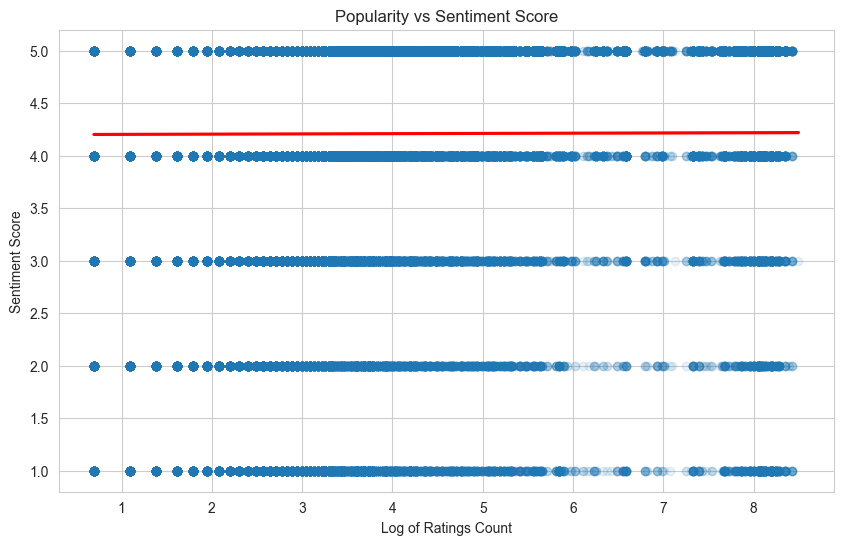

In [66]:
sampled_df['log_ratingsCount'] = np.log(sampled_df['ratingsCount'] + 1)

# Now we create a scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x='log_ratingsCount', y='review/score', data=sampled_df, scatter_kws={'alpha':0.1}, line_kws={'color':'red'})
plt.title('Popularity vs Sentiment Score')
plt.xlabel('Log of Ratings Count')
plt.ylabel('Sentiment Score')
plt.show()

Text(0.5, 1.0, 'Word Cloud for Positive Reviews')

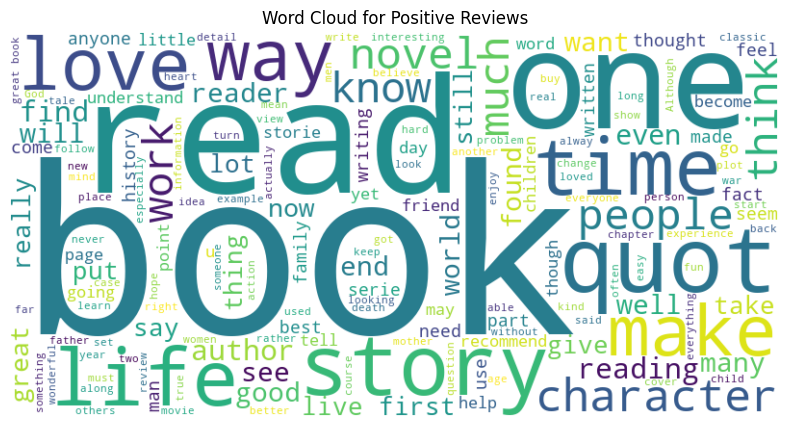

In [17]:
# i am creating Positive Reviews Word Cloud:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
random.seed(42)
positive_reviews = ' '.join(sampled_df[sampled_df['sentiment_category'] == 'Positive']['review/text'])

wordcloud_pos = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS, min_font_size=10).generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Positive Reviews') 

Text(0.5, 1.0, 'Word Cloud for Negative Reviews')

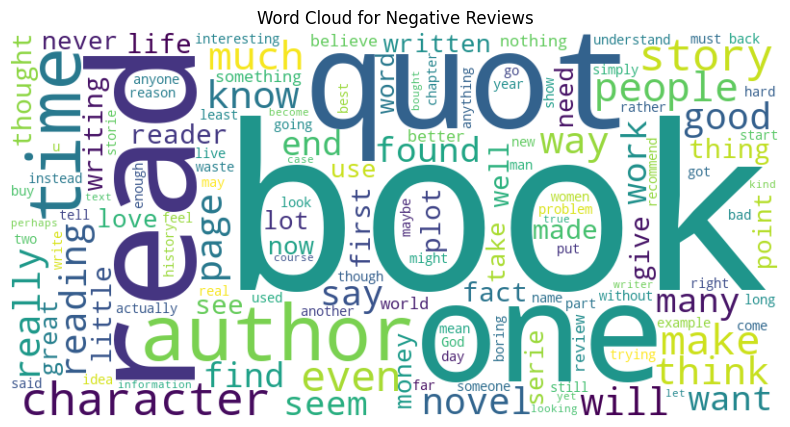

In [22]:
from wordcloud import WordCloud, STOPWORDS
random.seed(42)
negative_reviews = ' '.join(sampled_df[sampled_df['sentiment_category'] == 'Negative']['review/text'])

wordcloud_neg = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS, min_font_size=10).generate(negative_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Negative Reviews') 

In [63]:
sampled_df.head()

,Title,description,authors,ratingsCount,review/score,review/summary,review/text,categories,tokenized_review,sentiment_category
0,Sacred Path Cards: The Discovery of Self Throu...,This extraordinary tool for self-discovery dra...,Jamie Sams,2.0,4.0,I regularly use the cards and read the book an...,The book and the cards have definately changed...,"Body, Mind & Spirit","[book, card, definately, change, live, life, u...",Positive
1,Lord of the flies,William Golding’s unforgettable classic of boy...,William Golding,2861.0,5.0,Lord of the Flies,This book was written excellentally by Golding...,Fiction,"[book, write, excellentally, golde, express, o...",Positive
2,Lord of the Flies,William Golding’s unforgettable classic of boy...,William Golding,2861.0,4.0,Lord of the flies,The Lord of the flies takes you on a realistic...,Fiction,"[lord, fly, take, realistic, journy, story, st...",Positive
3,The doomsters,"Hired by Carl Hallman, the desperate-eyed junk...",Ross Macdonald,3.0,5.0,Both a good puzzler and good though tragic drama,I don't know why the heck it took me so long t...,Fiction,"[know, heck, take, long, discover, ross, macdo...",Positive
4,"The Hobbitt, or there and back again; illustra...","Bilbo Baggins, a respectable, well-to-do hobbi...",J. R. R. Tolkien,9.0,5.0,Classic,This book is a timeless classic that is and wi...,Fiction,"[book, timeless, classic, continue, enjoy, gen...",Positive


In [328]:
print(sampled_df[['ratingsCount', 'review/score']].describe())
print(sampled_df[['ratingsCount', 'review/score']].corr())


        ratingsCount   review/score
count  204727.000000  204727.000000
mean      149.965329       4.207071
std       600.778609       1.211205
min         1.000000       1.000000
25%         5.000000       4.000000
50%         9.000000       5.000000
75%        19.000000       5.000000
max      4895.000000       5.000000
              ratingsCount  review/score
ratingsCount      1.000000      0.000625
review/score      0.000625      1.000000


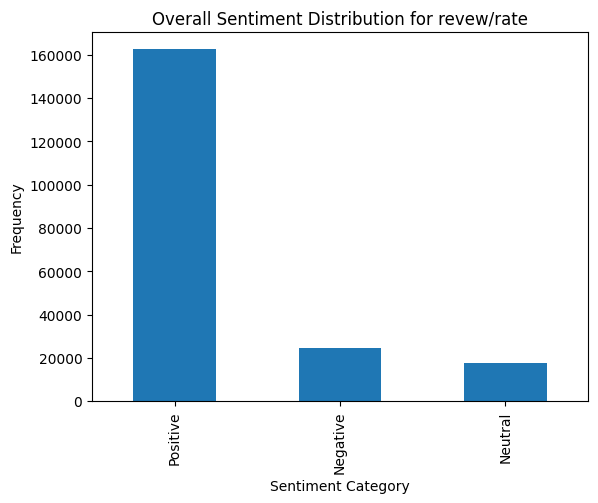

In [23]:
sampled_df['sentiment_category'].value_counts().plot(kind='bar')
plt.title('Overall Sentiment Distribution for revew/rate')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.show()


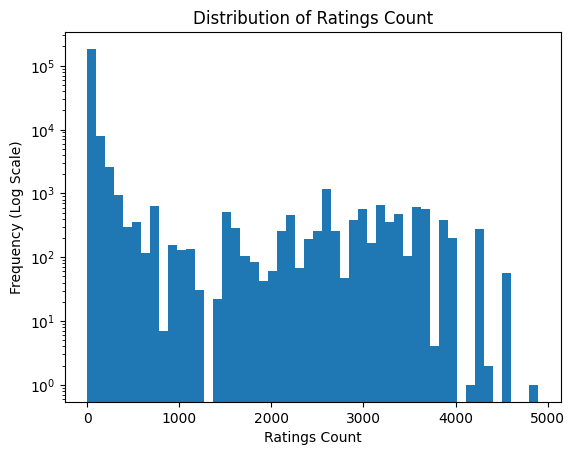

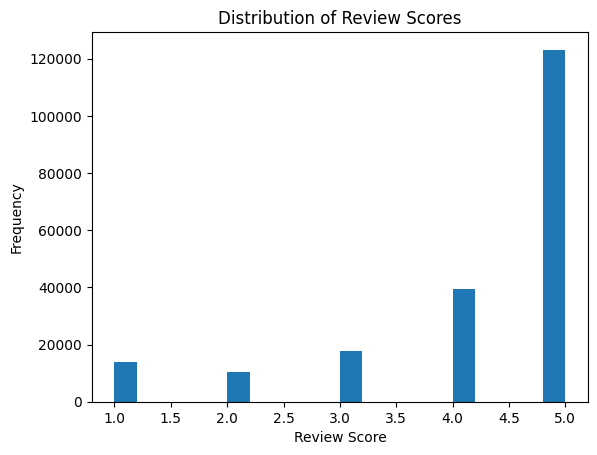

In [24]:
sampled_df['ratingsCount'].plot(kind='hist', bins=50, logy=True)
plt.title('Distribution of Ratings Count')
plt.xlabel('Ratings Count')
plt.ylabel('Frequency (Log Scale)')
plt.show()

sampled_df['review/score'].plot(kind='hist', bins=20)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.show()


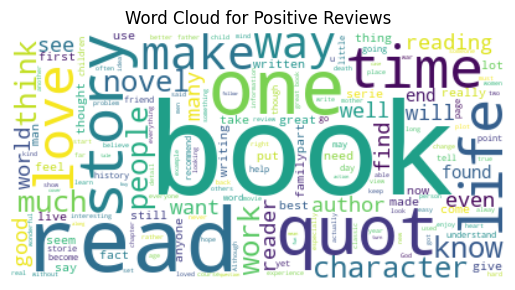

In [25]:
from wordcloud import WordCloud

# Generate a word cloud image for positive sentiment reviews
positive_reviews = ' '.join(sampled_df[sampled_df['sentiment_category'] == 'Positive']['review/text'])
wordcloud_pos = WordCloud(background_color="white").generate(positive_reviews)
random.seed(42)

plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Positive Reviews')
plt.show()

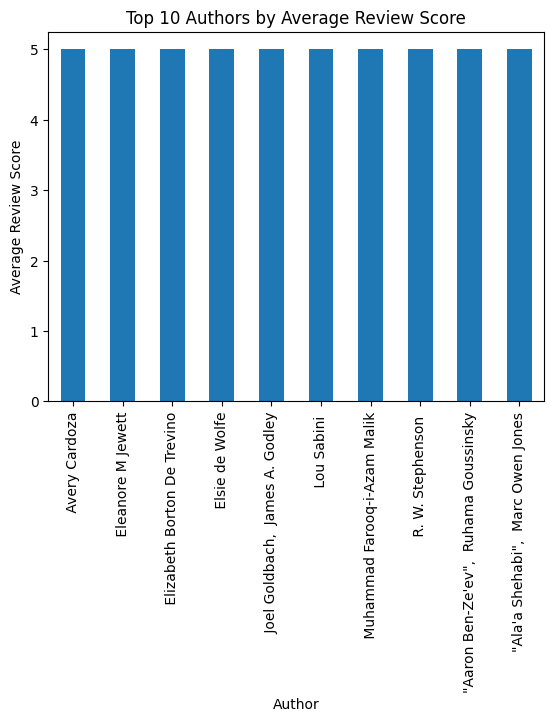

In [26]:
authors_sentiment = sampled_df.groupby('authors')['review/score'].mean().nlargest(10)
authors_sentiment.plot(kind='bar')
plt.title('Top 10 Authors by Average Review Score')
plt.xlabel('Author') 
plt.ylabel('Average Review Score')
plt.show()


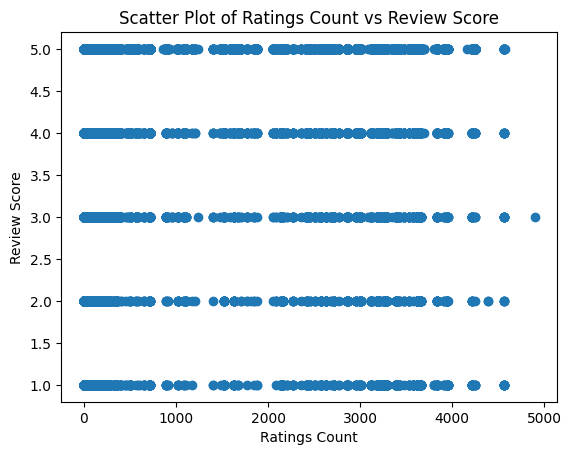

In [27]:
import matplotlib.pyplot as plt

plt.scatter(sampled_df['ratingsCount'], sampled_df['review/score'])
plt.xlabel('Ratings Count')
plt.ylabel('Review Score')
plt.title('Scatter Plot of Ratings Count vs Review Score')
plt.show()

C:\Users\Tareq\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tareq\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tareq\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


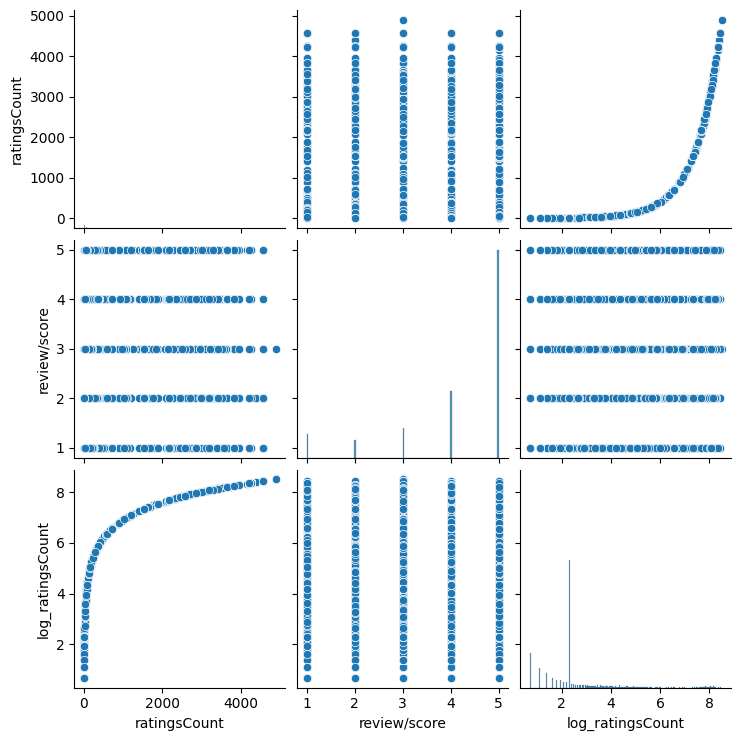

In [15]:
#scatterplot matrix Visualization for Exploring Relationship between snumerical variables in Sampled Data 
sns.pairplot(sampled_df)
plt.show()

Text(0.5, 0.98, 'Sentiment Distribution of book rating for Top 10 Authors')

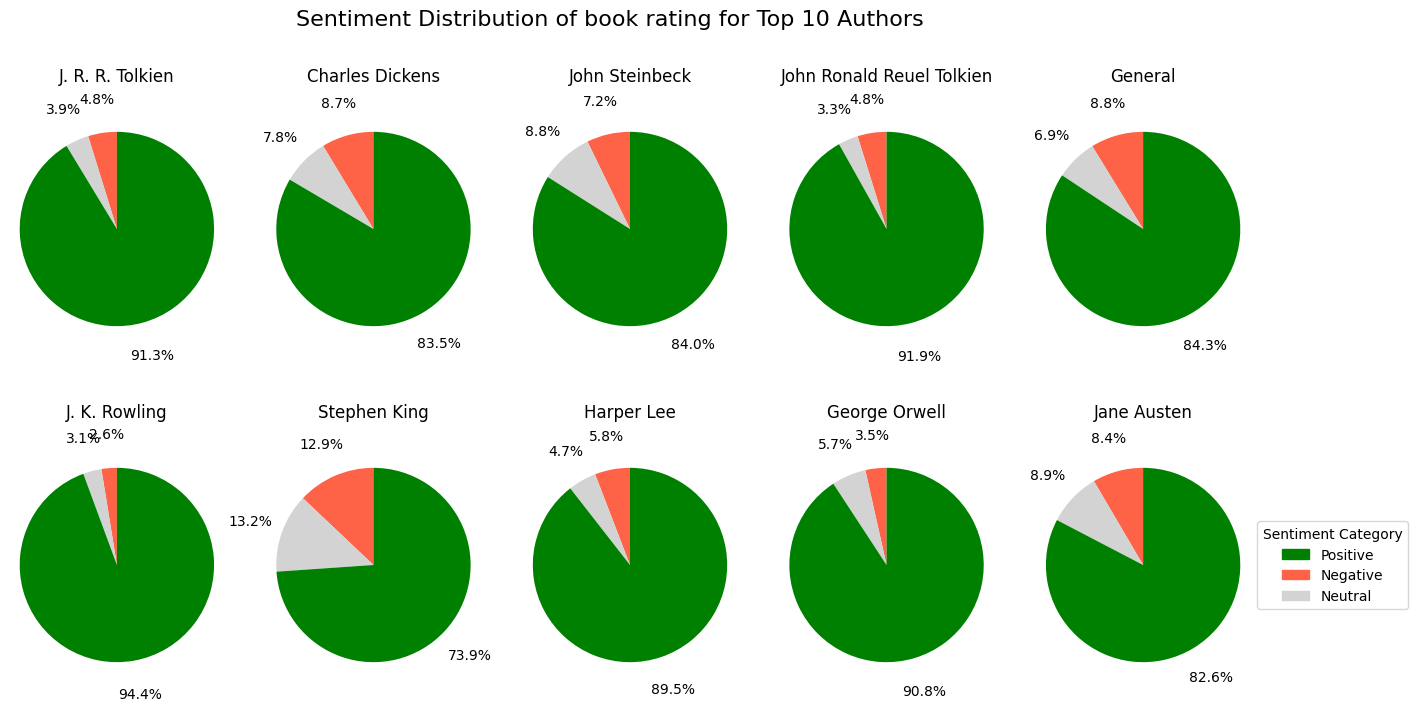

In [28]:
#Sentiment Distribution of book rating for Top 10 Authors

author_sentiment_counts = sampled_df.groupby(['authors', 'sentiment_category']).size().unstack(fill_value=0)

top_10_authors = author_sentiment_counts.sum(axis=1).nlargest(10).index

colors = {'Positive': 'green', 'Negative': 'tomato', 'Neutral': 'lightgray'}

fig, axs = plt.subplots(2, 5, figsize=(16, 8), squeeze=False)
axs = axs.flatten()
random.seed(42)
for i, author in enumerate(top_10_authors):
    sentiment_counts = author_sentiment_counts.loc[author]
    pie = axs[i].pie(sentiment_counts, colors=[colors.get(label, 'black') for label in sentiment_counts.index], labels=None, startangle=90, autopct='%1.1f%%', pctdistance=1.35)
    axs[i].set_title(author)
    axs[i].axis('equal')

legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors.values()]
plt.legend(legend_handles, colors.keys(), loc='center left', bbox_to_anchor=(1, 0.5), title='Sentiment Category')

plt.suptitle('Sentiment Distribution of book rating for Top 10 Authors', fontsize=16)


Text(0.5, 0.98, 'Sentiment Distribution of book rating for Top 10 Categories')

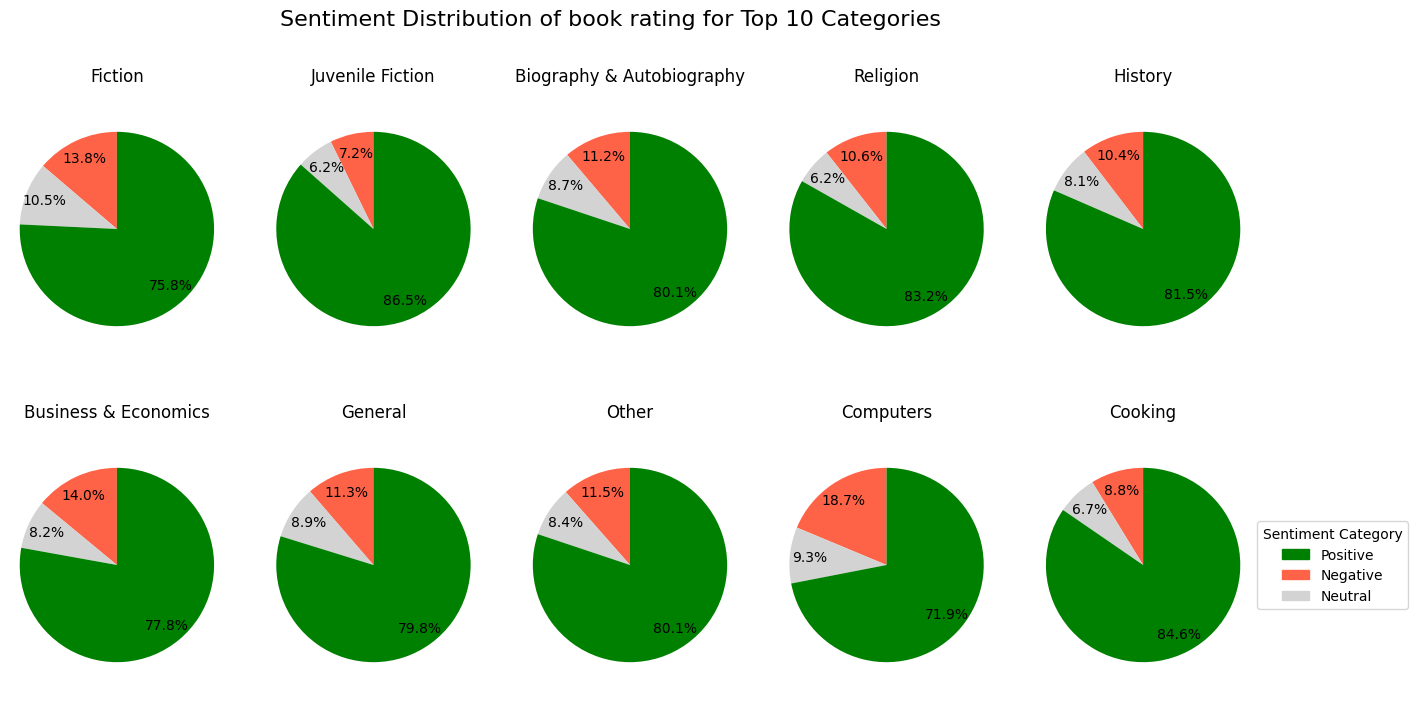

In [29]:
#Sentiment Distribution of book rating for Top 10 Categories
category_sentiment_counts = sampled_df.groupby(['categories', 'sentiment_category']).size().unstack(fill_value=0)
top_10_categories = category_sentiment_counts.sum(axis=1).nlargest(10).index

colors = {'Positive': 'green', 'Negative': 'tomato', 'Neutral': 'lightgray'}

fig, axs = plt.subplots(2, 5, figsize=(16, 8), squeeze=False)
axs = axs.flatten()


for i, category in enumerate(top_10_categories):
    sentiment_counts = category_sentiment_counts.loc[category]
    pie = axs[i].pie(sentiment_counts, colors=[colors.get(label, 'black') for label in sentiment_counts.index], labels=None, startangle=90, autopct='%1.1f%%', pctdistance=0.80)
    axs[i].set_title(category)
    axs[i].axis('equal')

legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors.values()]
plt.legend(legend_handles, colors.keys(), loc='center left', bbox_to_anchor=(1, 0.5), title='Sentiment Category')

plt.suptitle('Sentiment Distribution of book rating for Top 10 Categories', fontsize=16)

  creating new column review_length for calculated average review/textlength of each review and
  visualize the Average Review Length for Top 10 Authors

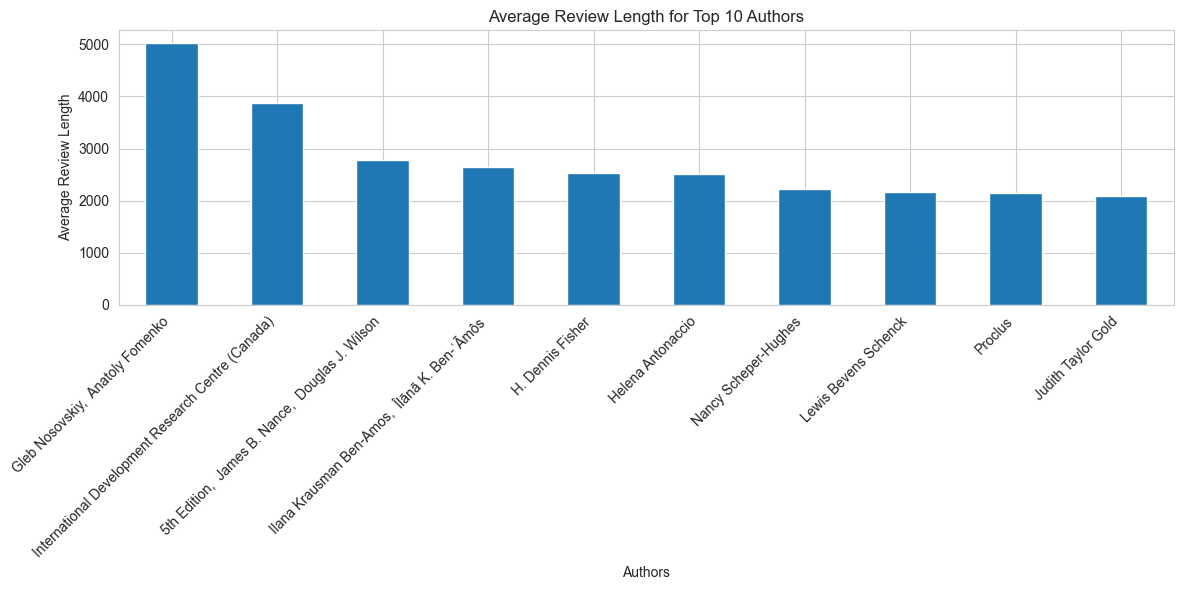

In [64]:
sampled_df['review_length'] = sampled_df['review/text'].apply(lambda x: len(x.split()))

author_avg_review_length = sampled_df.groupby('authors')['review_length'].mean().sort_values(ascending=False)

top_10_authors = author_avg_review_length.head(10)

top_10_authors.plot(kind='bar', figsize=(12, 6))
plt.title('Average Review Length for Top 10 Authors')
plt.xlabel('Authors')
plt.ylabel('Average Review Length')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [67]:
sampled_df.head()

,Title,description,authors,ratingsCount,review/score,review/summary,review/text,categories,tokenized_review,sentiment_category,review_length,log_ratingsCount
0,Sacred Path Cards: The Discovery of Self Throu...,This extraordinary tool for self-discovery dra...,Jamie Sams,2.0,4.0,I regularly use the cards and read the book an...,The book and the cards have definately changed...,"Body, Mind & Spirit","[book, card, definately, change, live, life, u...",Positive,51,1.098612
1,Lord of the flies,William Golding’s unforgettable classic of boy...,William Golding,2861.0,5.0,Lord of the Flies,This book was written excellentally by Golding...,Fiction,"[book, write, excellentally, golde, express, o...",Positive,37,7.959276
2,Lord of the Flies,William Golding’s unforgettable classic of boy...,William Golding,2861.0,4.0,Lord of the flies,The Lord of the flies takes you on a realistic...,Fiction,"[lord, fly, take, realistic, journy, story, st...",Positive,86,7.959276
3,The doomsters,"Hired by Carl Hallman, the desperate-eyed junk...",Ross Macdonald,3.0,5.0,Both a good puzzler and good though tragic drama,I don't know why the heck it took me so long t...,Fiction,"[know, heck, take, long, discover, ross, macdo...",Positive,167,1.386294
4,"The Hobbitt, or there and back again; illustra...","Bilbo Baggins, a respectable, well-to-do hobbi...",J. R. R. Tolkien,9.0,5.0,Classic,This book is a timeless classic that is and wi...,Fiction,"[book, timeless, classic, continue, enjoy, gen...",Positive,26,2.302585


This code generates a scatter plot of review text length against review rating and calculates the correlation coefficient between these two variables

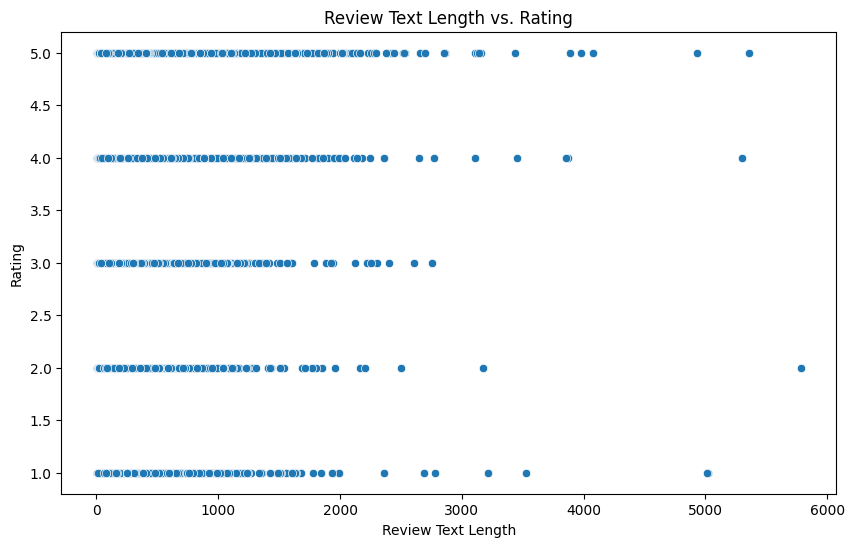

Correlation coefficient: -0.055603010745443764


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_length', y='review/score', data=sampled_df)
plt.title('Review Text Length vs. Rating')
plt.xlabel('Review Text Length')
plt.ylabel('Rating')
plt.show()

correlation = sampled_df[['review_length', 'review/score']].corr().iloc[0, 1]
print(f"Correlation coefficient: {correlation}")



# Part 6:

### text preprocessing 2

In [57]:
import spacy

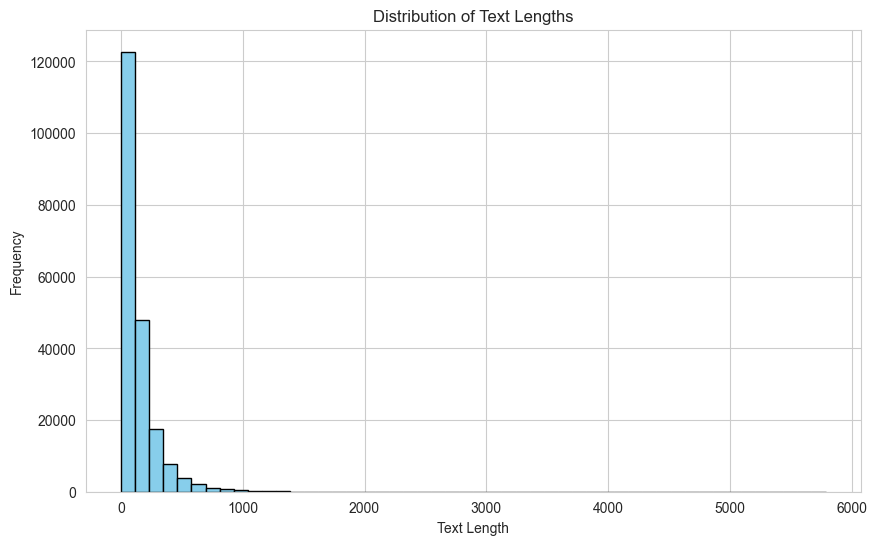

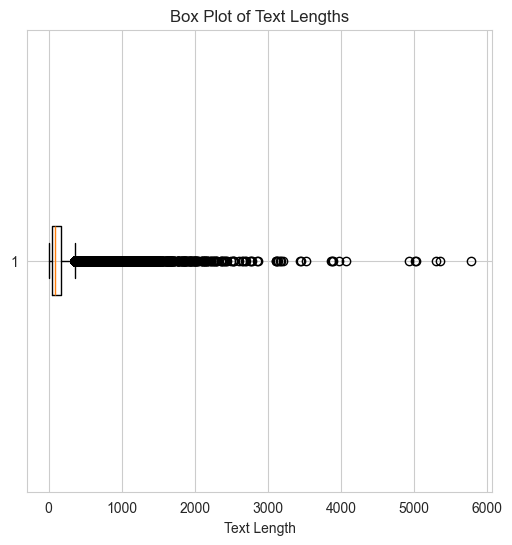

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot histogram of text lengths
plt.figure(figsize=(10, 6))
plt.hist(sampled_df['review_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot box plot of text lengths
plt.figure(figsize=(6, 6))
plt.boxplot(sampled_df['review_length'], vert=False)
plt.title('Box Plot of Text Lengths')
plt.xlabel('Text Length')
plt.grid(True)
plt.show()

In [6]:
# Calculate the length of each review
sampled_df['review_length'] = sampled_df['tokenized_review'].apply(len)

print(sampled_df[['tokenized_review', 'review_length']].head())

                                    tokenized_review  review_length
0  [book, card, definately, change, live, life, u...             19
1  [book, write, excellentally, golde, express, o...             20
2  [lord, fly, take, realistic, journy, story, st...             42
3  [know, heck, take, long, discover, ross, macdo...             78
4  [book, timeless, classic, continue, enjoy, gen...             11


In [7]:
import pandas as pd

# Calculate the length of each review
sampled_df['review_length'] = sampled_df['tokenized_review'].apply(len)

# Find the length of the longest and shortest reviews
longest_length = sampled_df['review_length'].max()
shortest_length = sampled_df['review_length'].min()

# Print the number of words in the longest and shortest reviews
print("Number of words in the longest review:", longest_length)
print("Number of words in the shortest review:", shortest_length)

Number of words in the longest review: 2695
Number of words in the shortest review: 0


In [8]:
import pandas as pd
# Count the number of reviews with 0 to 50 words
reviews_0_to_50 = sampled_df[(sampled_df['review_length'] >= 0) & (sampled_df['review_length'] <= 50)].shape[0]

print("Number of reviews with 0 to 50 words:", reviews_0_to_50)

Number of reviews with 0 to 50 words: 121261


In [112]:
sampled_df.describe() 

,ratingsCount,review/score,review_length,log_ratingsCount,review_length1
count,204727.000000,204727.000000,204727.000000,204727.000000,204727.000000
mean,149.965329,4.207071,142.413521,2.648609,64.317809
std,600.778609,1.211205,161.989461,1.598294,76.008330
min,1.000000,1.000000,1.000000,0.693147,0.000000
25%,5.000000,4.000000,48.000000,1.791759,21.000000
50%,9.000000,5.000000,92.000000,2.302585,40.000000
75%,19.000000,5.000000,175.000000,2.995732,78.000000
max,4895.000000,5.000000,5785.000000,8.496174,2695.000000


# Part 7: Feature Extraction and Modeling Preparation

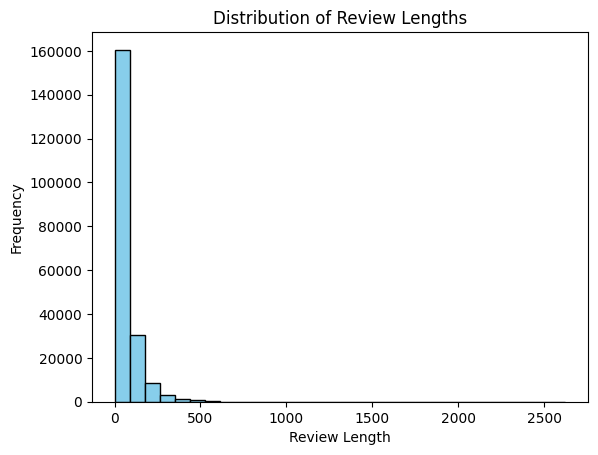

In [57]:
import matplotlib.pyplot as plt

# Plotting the distribution of review lengths
plt.hist(sampled_df['review_length'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths')
plt.show()


In [8]:
 
sentiment_df = sampled_df[['Title', 'authors', 'ratingsCount', 'review/score', 'review/text', 'categories', 'tokenized_review', 'review_length']].copy()
sentiment_df.rename(columns={'categories': 'genre'}, inplace=True)



- Vectorization with TF-IDF (Term Frequency-Inverse Document Frequency)

This code converts tokenized reviews into TF-IDF scores using the TfidfVectorizer from scikit-learn. First, it converts the lists of tokens back into strings to meet the input requirements of the vectorizer. Then, it initializes the vectorizer, fits it to the processed reviews, and transforms them into TF-IDF matrices. The resulting TF-IDF matrices contain the TF-IDF scores for each review.


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer with parameters similar to the Word2Vec setup
tfidf_vectorizer = TfidfVectorizer(min_df=3, max_df=0.8, max_features=100)

# Fit and transform the data
tfidf_matrix = tfidf_vectorizer.fit_transform(sentiment_df['processed_reviews'])

print(tfidf_matrix.shape)

(204727, 100)


-Document Embedding with Word2Vec:

Create document representations using Word2Vec embeddings through averaging of word vectors


In [10]:
#https://spotintelligence.com/2023/02/15/word2vec-for-text-classification/
#Word2Vec Text Classification Vectorization
from gensim.models import Word2Vec
import numpy as np

model = Word2Vec(sentences=sentiment_df['tokenized_review'], vector_size=100, window=3, min_count=3, workers=10)
model_vocab_set = set(model.wv.index_to_key)

def document_vector(word_list):
    word_list = [word for word in word_list if word in model_vocab_set]
    if not word_list:
        return np.zeros(model.vector_size)
    else:
        return np.mean(model.wv[word_list], axis=0)

sentiment_df['doc_vector'] = sentiment_df['tokenized_review'].apply(document_vector)

In [33]:
# here checking the shape of the feature matrix
print("Shape of training data:", X_train_smote_word2vec.shape)

Shape of training data: (414762, 100)


In [34]:
#Generate Sentiment Labels
#https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def get_sentiment_category(review):
    scores = sia.polarity_scores(review)
    if scores['compound'] > 0.05:
        return 'positive'
    elif scores['compound'] < -0.05:
        return 'negative'
    else:
        return 'neutral'

sentiment_df['sentiment'] = sentiment_df['processed_reviews'].apply(get_sentiment_category)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Tareq\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


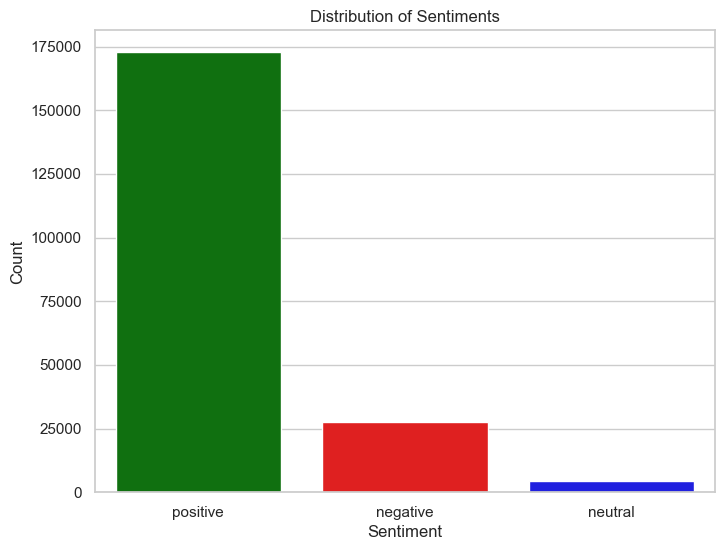

In [35]:
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=sentiment_df, x='sentiment', palette=["green", "red", "blue"])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

-Class Balancing with SMOTE for TF-IDF Features

This code applies the Synthetic Minority Over-sampling Technique (SMOTE) to address class imbalance in TF-IDF features. It splits the dataset into training and testing sets and then applies SMOTE to the training data to create a more balanced distribution of classes. This ensures better performance of machine learning models trained on TF-IDF features.

In [36]:
#Apply SMOTE to the TF-IDF training set to address class imbalance
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

y = sentiment_df['sentiment'].values
 
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)

# Applying SMOTE for Class Balancing in TF-IDF
smote_tfidf = SMOTE(random_state=42, n_jobs=-1)
X_train_smote_tfidf, y_train_smote_tfidf = smote_tfidf.fit_resample(X_train_tfidf, y_train_tfidf)

C:\Users\Tareq\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\over_sampling\_smote\base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [37]:
#Class Distribution after SMOTE
y_train_smote_df = pd.DataFrame(y_train_smote_tfidf, columns=['sentiment'])

class_distribution = y_train_smote_df['sentiment'].value_counts()
print("Class Distribution after SMOTE:\n", class_distribution)

Class Distribution after SMOTE:
 sentiment
positive    138254
neutral     138254
negative    138254
Name: count, dtype: int64


- next cell Word2Vec Feature Preparation and SMOTE Class Balancing

This following code prepares Word2Vec features for machine learning and applies SMOTE to balance class distribution. It converts Word2Vec document vectors into a feature matrix, splits the dataset for training and testing, and addresses class imbalance using SMOTE.


In [38]:
#Word2Vec Feature Preparation and Class Balancing with SMOTE

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np

word2vec_features = np.array(sentiment_df['doc_vector'].tolist())

y = sentiment_df['sentiment'].values

X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(
    word2vec_features, y, test_size=0.2, random_state=42)

smote_word2vec = SMOTE(random_state=42, n_jobs=-1)
X_train_smote_word2vec, y_train_smote_word2vec = smote_word2vec.fit_resample(X_train_word2vec, y_train_word2vec)

C:\Users\Tareq\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\over_sampling\_smote\base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


### XGBoost and TF-IDF
Objective: Train an XGBoost classifier on TF-IDF features for sentiment analysis.
Steps: Initialize XGBoost classifier, train the classifier, predict sentiment labels, evaluate performance.
Input Data: Training and test data with TF-IDF features and labels.
Output: Classification report and accuracy score.

-Label Encoding

This part involves converting  target variables (sentiment labels) into a format suitable for machine learning models, which require numerical input.

In [42]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_smote_tfidf)  
y_test_encoded = label_encoder.transform(y_test_tfidf)

-XGBoost Classifier Training

Here, we initialize and fit the XGBoost classifier using the TF-IDF vectorized training data and the encoded labels from code above

In [132]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(random_state=42, eval_metric='mlogloss')
xgb_classifier.fit(X_train_smote_tfidf, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

-Model Prediction & Evaluation

In this final part, we use the trained model to make predictions on the test set. Then, we decode these predictions back to their original labels for interpretability and evaluate the model's performance using classification metrics

In [133]:
from sklearn.metrics import classification_report, accuracy_score

y_pred_encoded = xgb_classifier.predict(X_test_tfidf)          

y_pred_f = label_encoder.inverse_transform(y_pred_encoded)

print(classification_report(y_test_tfidf, y_pred_f))
print("Accuracy:", accuracy_score(y_test_tfidf, y_pred_f))

              precision    recall  f1-score   support

    negative       0.37      0.36      0.37      5528
     neutral       0.13      0.64      0.22       901
    positive       0.91      0.82      0.86     34517

    accuracy                           0.75     40946
   macro avg       0.47      0.61      0.48     40946
weighted avg       0.82      0.75      0.78     40946

Accuracy: 0.7548722707956821


### XGBoost  (Extreme Gradient Boosting) and Word2Vec

Objective: Train an XGBoost classifier on Word2Vec features for sentiment analysis.
Steps: Initialize XGBoost classifier, train using SMOTE-adjusted data, predict sentiment labels, evaluate performance.
Input Data: Training and test data with Word2Vec features and labels.
Output: Classification report and accuracy score.



In [22]:
# Check the dimensionality of X_train_smote_word2vec and y_train_smote_word2vec
print("Shape of X_train_smote_word2vec:", X_train_smote_word2vec.shape)



Shape of X_train_smote_word2vec: (414762, 100)


Encode Target Classes
The target classes in `y_train_smote_word2vec` and `y_test_word2vec` are in string format ('negative', 'neutral', 'positive'). XGBoost requires the target classes to be encoded as integers for training. Therefore, we use `LabelEncoder` to transform the string labels into integer labels. This step ensures that the target classes are in the correct format for model training and evaluation.



In [59]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_smote_word2vec)
y_test_encoded = label_encoder.transform(y_test_word2vec)

In [60]:
#Initialize and Fit XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(random_state=42, eval_metric='mlogloss')
xgb_classifier.fit(X_train_smote_word2vec, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [83]:
#Predict and Evaluate Model Performance
from sklearn.metrics import classification_report, accuracy_score

# Predict sentiments on the test set
y_pred_encoded = xgb_classifier.predict(X_test_word2vec)

y_pred = label_encoder.inverse_transform()

print(classification_report(y_test_word2vec, y_pred))
print("Accuracy:", accuracy_score(y_test_word2vec, y_pred))

              precision    recall  f1-score   support

    negative       0.47      0.73      0.57      5528
     neutral       0.14      0.46      0.21       901
    positive       0.95      0.81      0.88     34517

    accuracy                           0.79     40946
   macro avg       0.52      0.66      0.55     40946
weighted avg       0.87      0.79      0.82     40946

Accuracy: 0.7921164460508963


In [99]:
#cross validation Word2Vec
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

model_word2vec = XGBClassifier()
scores_word2vec = cross_val_score(model_word2vec, X_test_word2vec, y_pred_encoded, cv=5, scoring='accuracy')
print("Average accuracy of CV with Word2Vec: ", scores_word2vec.mean())

Average accuracy of CV with Word2Vec:  0.8949591868898257


In [98]:
#cross validation TF_IDF
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

model_tfidf = XGBClassifier()
scores_tfidf = cross_val_score(model_tfidf, X_test_tfidf, y_pred_encoded, cv=5, scoring='accuracy')
print("Average accuracy of CV with TF-IDF: ", scores_tfidf.mean())


Average accuracy of CV with TF-IDF:  0.751550939935358


### visualization 

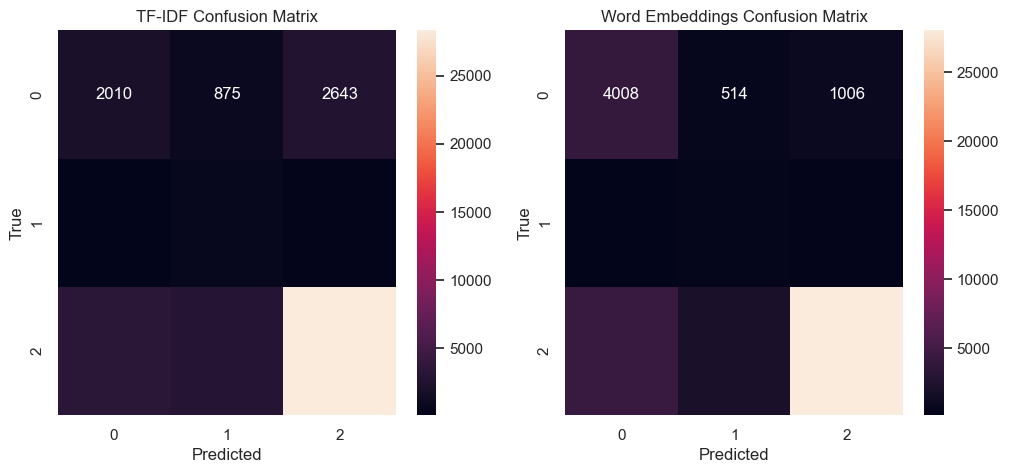

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm_tfidf = confusion_matrix(y_test_tfidf, y_pred_f)
cm_embeddings = confusion_matrix(y_test_word2vec, y_pred)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_tfidf, annot=True, fmt='d', ax=ax[0])
ax[0].set_title('TF-IDF Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')

sns.heatmap(cm_embeddings, annot=True, fmt='d', ax=ax[1])
ax[1].set_title('Word Embeddings Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('True')

plt.show()


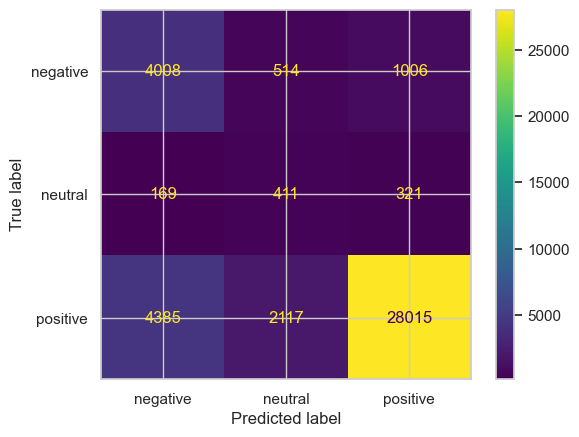

In [136]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_embeddings = confusion_matrix(y_test_word2vec, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_embeddings, display_labels=label_encoder.classes_)
disp.plot()


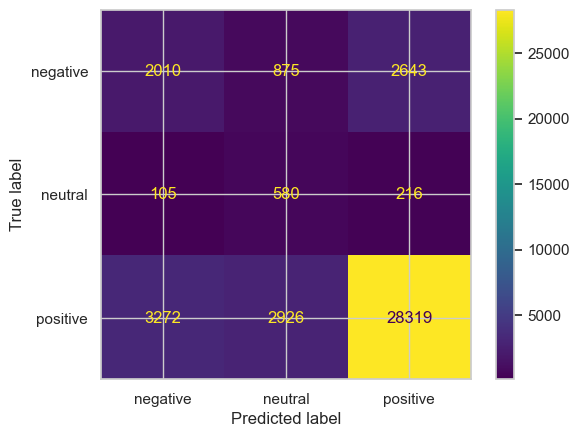

In [137]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_tfidf = confusion_matrix(y_test_tfidf, y_pred_f)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tfidf, display_labels=label_encoder.classes_)
disp.plot()

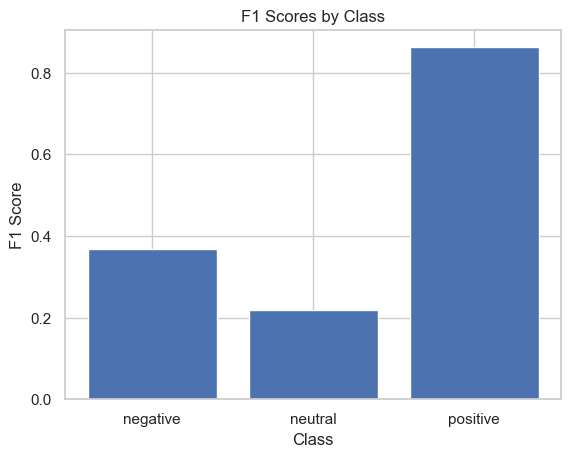

In [48]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np

f1_scores = f1_score(y_test_word2vec, y_pred, labels=["negative", "neutral", "positive"], average=None)

plt.bar(["negative", "neutral", "positive"], f1_scores)
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.title('F1 Scores by Class')
plt.show()


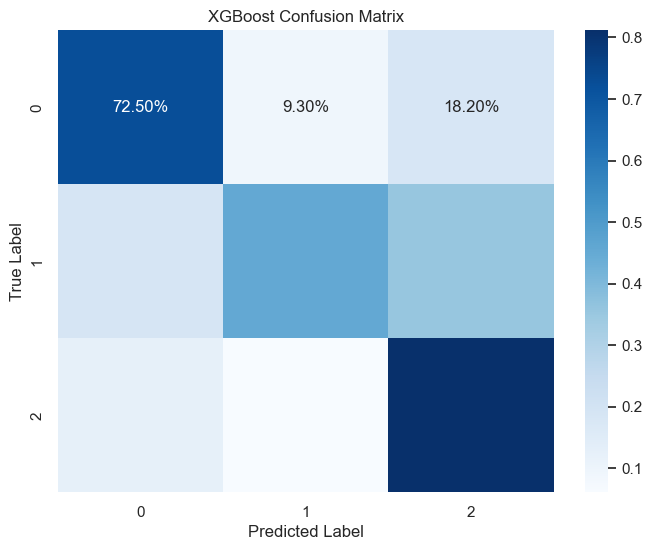

In [62]:
XGB2_cm = confusion_matrix(y_test_word2vec, y_pred)


XGB2_cm_normalized = XGB2_cm / XGB2_cm.sum(axis=1)[:, np.newaxis]

# Plotting the normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(XGB2_cm_normalized, annot=True, fmt=".2%", cmap="Blues")
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


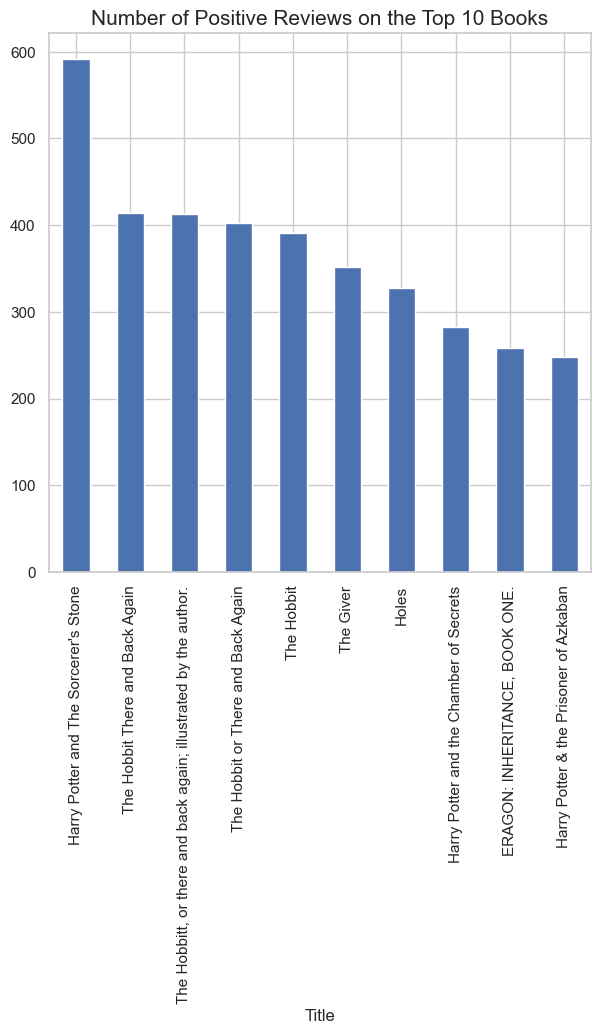

In [103]:
# Visualization for the most number of Positive Reviews on the top 10 Books
positive_reviews = sentiment_df[sentiment_df['sentiment'] == 'positive']['Title'].value_counts().head(10)
positive_reviews.plot(kind='bar', figsize=(7, 7))
plt.title('Number of Positive Reviews on the Top 10 Books', fontsize=15)
plt.xticks(rotation=90)
plt.show()

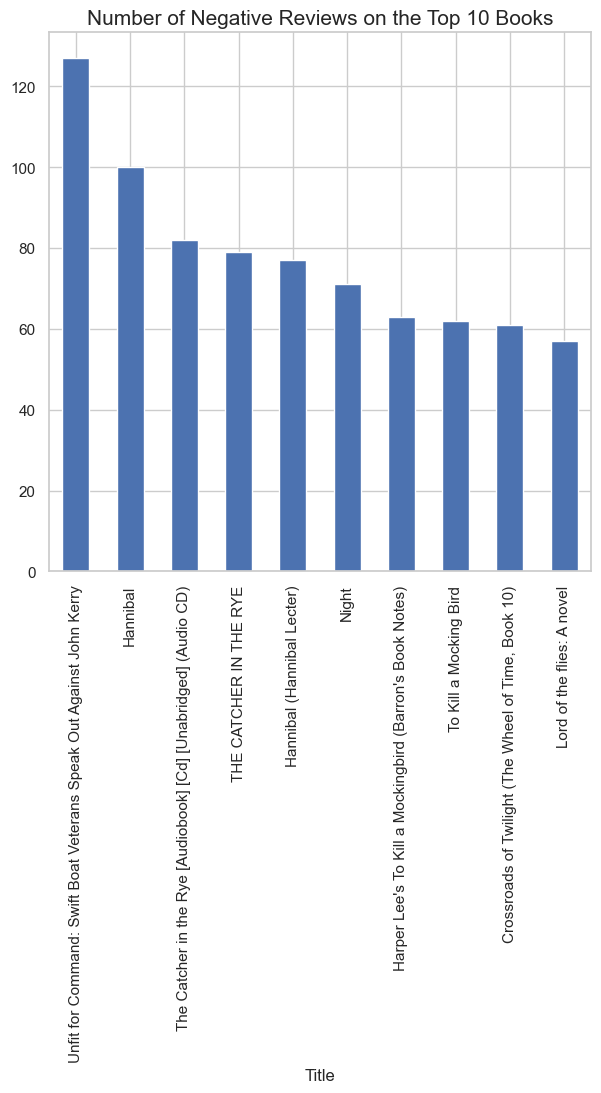

In [104]:
# Visualization for the most number of Negative Reviews on the top 10 Books
negative_reviews = sentiment_df[sentiment_df['sentiment'] == 'negative']['Title'].value_counts().head(10)
negative_reviews.plot(kind='bar', figsize=(7, 7))
plt.title('Number of Negative Reviews on the Top 10 Books', fontsize=15)
plt.xticks(rotation=90)
plt.show()

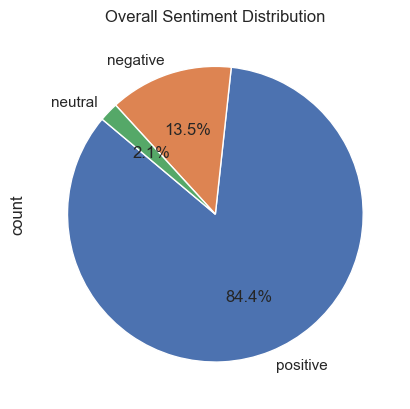

In [105]:
#positive, negative, and neutral
sentiment_df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Overall Sentiment Distribution')
plt.show()


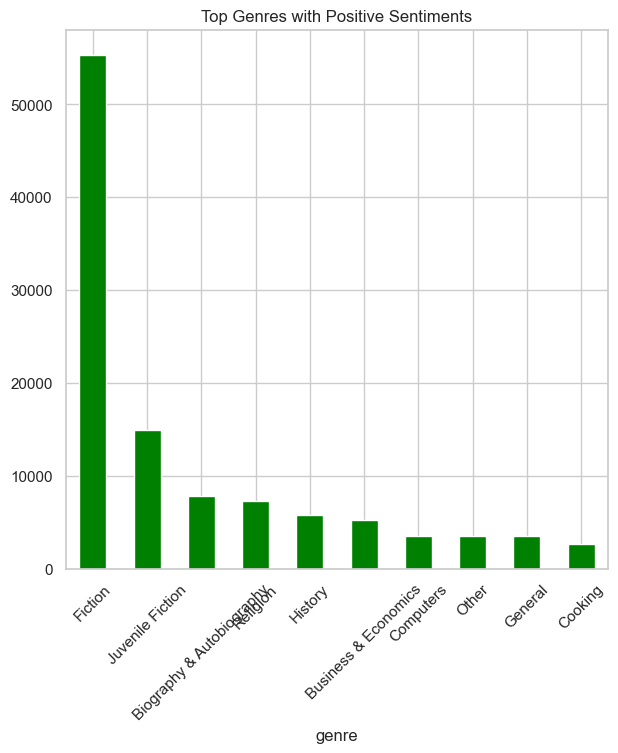

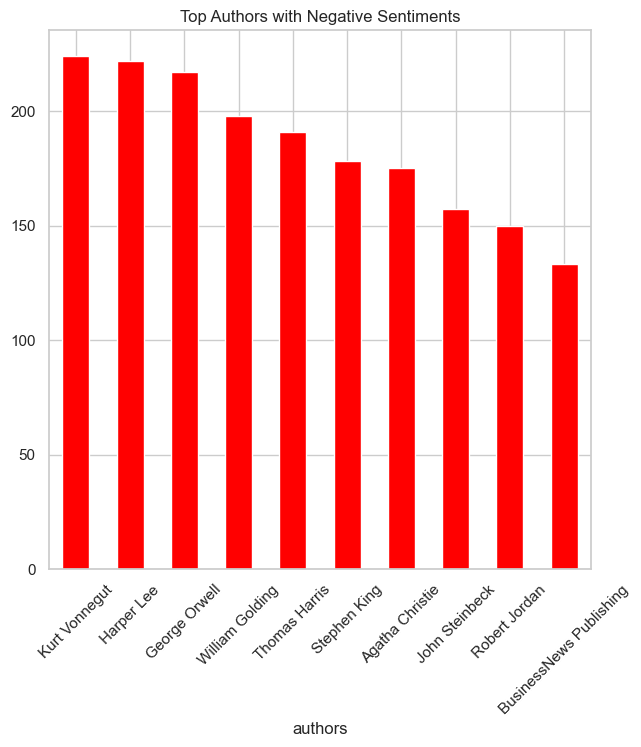

In [108]:
# Top Genres with the Most Positive Sentiments
sentiment_df[sentiment_df['sentiment'] == 'positive']['genre'].value_counts().head(10).plot(kind='bar', color='green', figsize=(7,7))
plt.title('Top Genres with Positive Sentiments')
plt.xticks(rotation=45)
plt.show()

# Top Authors with the Most Negative Sentiments
sentiment_df[sentiment_df['sentiment'] == 'negative']['authors'].value_counts().head(10).plot(kind='bar', color='red', figsize=(7,7))
plt.title('Top Authors with Negative Sentiments')
plt.xticks(rotation=45)
plt.show()
